In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

In [98]:
#read dataset as pandas dataframe 
df = pd.read_csv('./heart.csv')
#print first 6 rows of the dataset.
df.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [99]:
#print last 6 rows of the dataset.
df.tail(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [100]:
#check number of columns and rows of the dataset.
df.shape

(918, 12)

In [73]:
#print column names of the dataset.
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

This dataset contain 918 rows and 12 columns.

In [74]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

This dataset doesn't contain any null values.

In [75]:
#check duplicate values in the dataset.
df.duplicated().sum()

0

This dataset contain any duplicate value.

In [76]:
#get more information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [77]:
#get detailed about numerical values
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data representation using graphs

values of  Age column
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
 


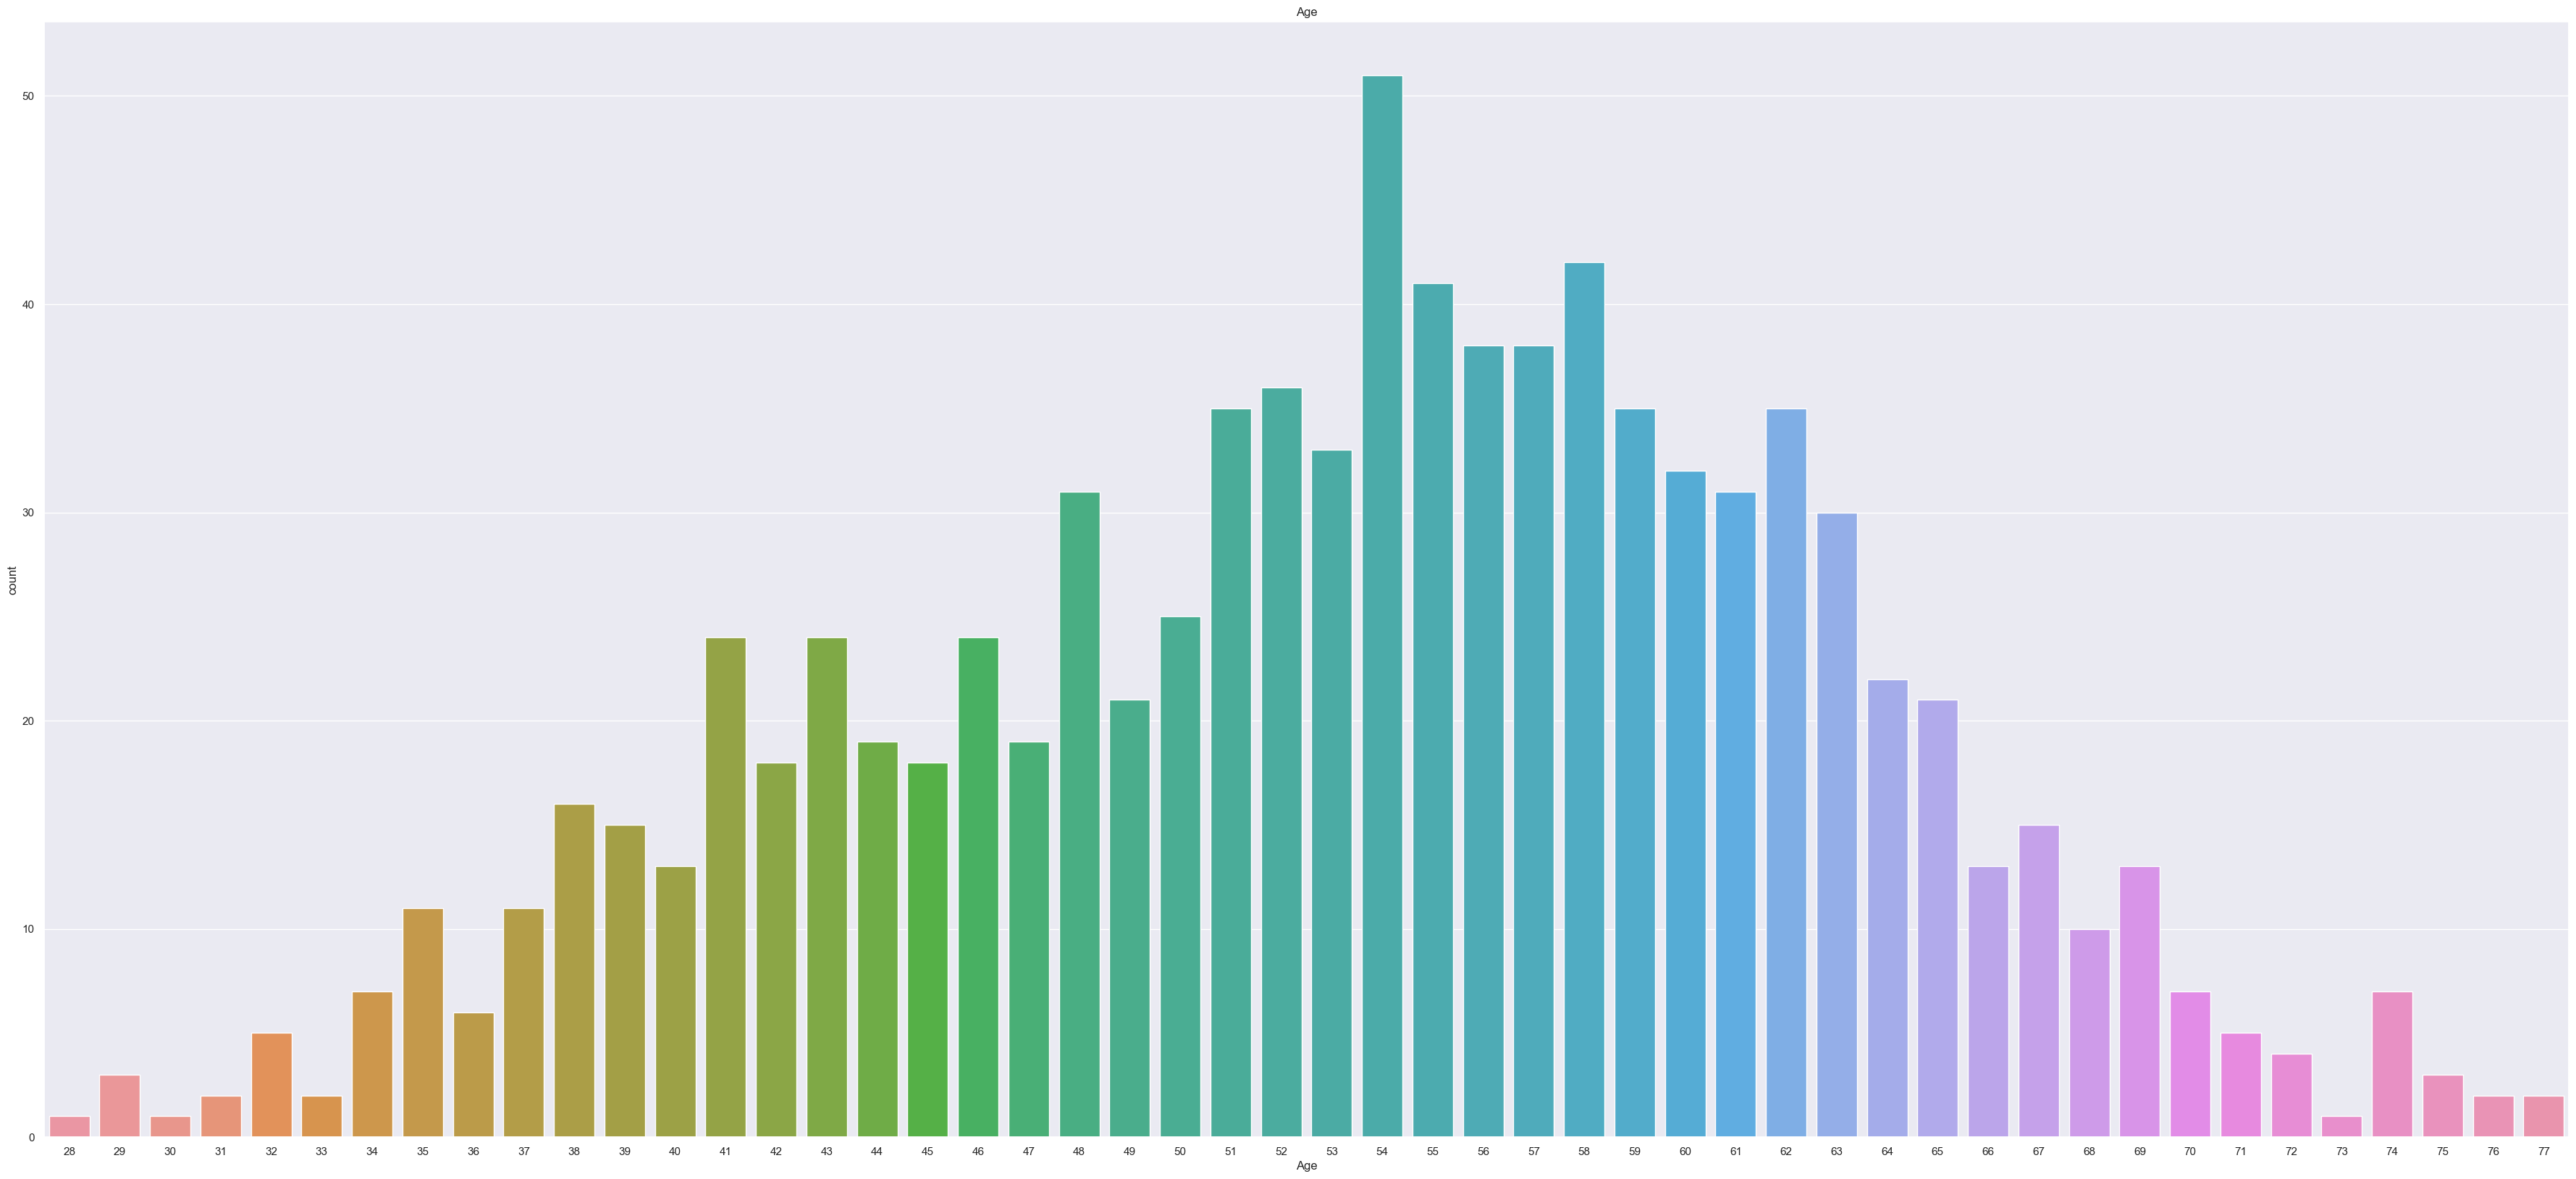

---------------------------------------------------------------------------------------------------------------
values of  Sex column
M    725
F    193
Name: Sex, dtype: int64
 


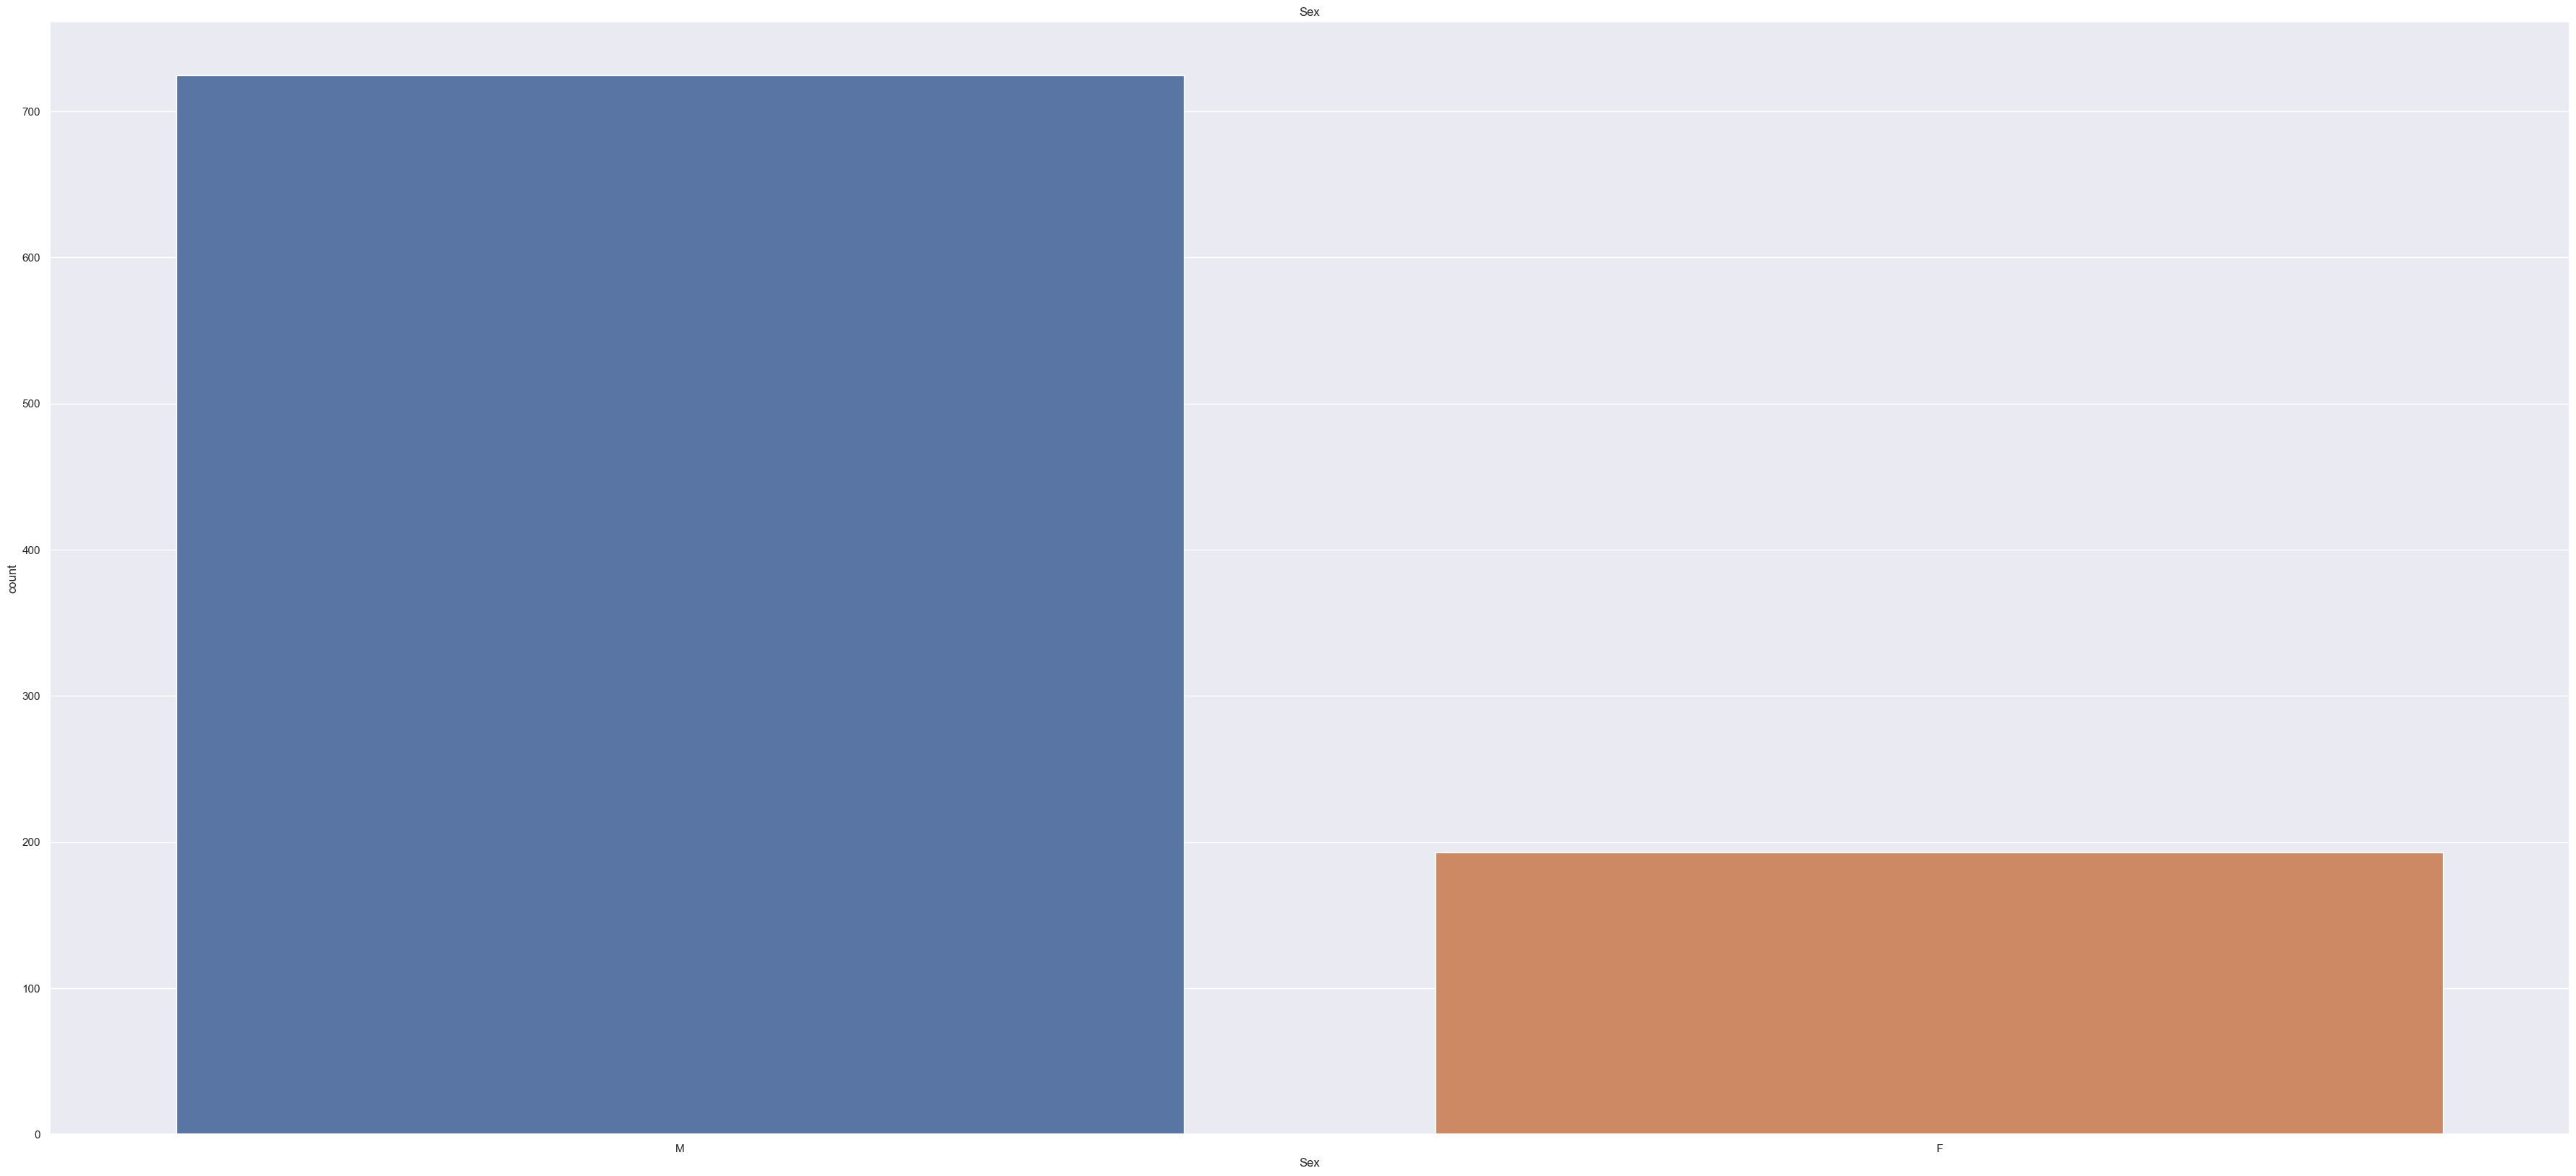

---------------------------------------------------------------------------------------------------------------
values of  ChestPainType column
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
 


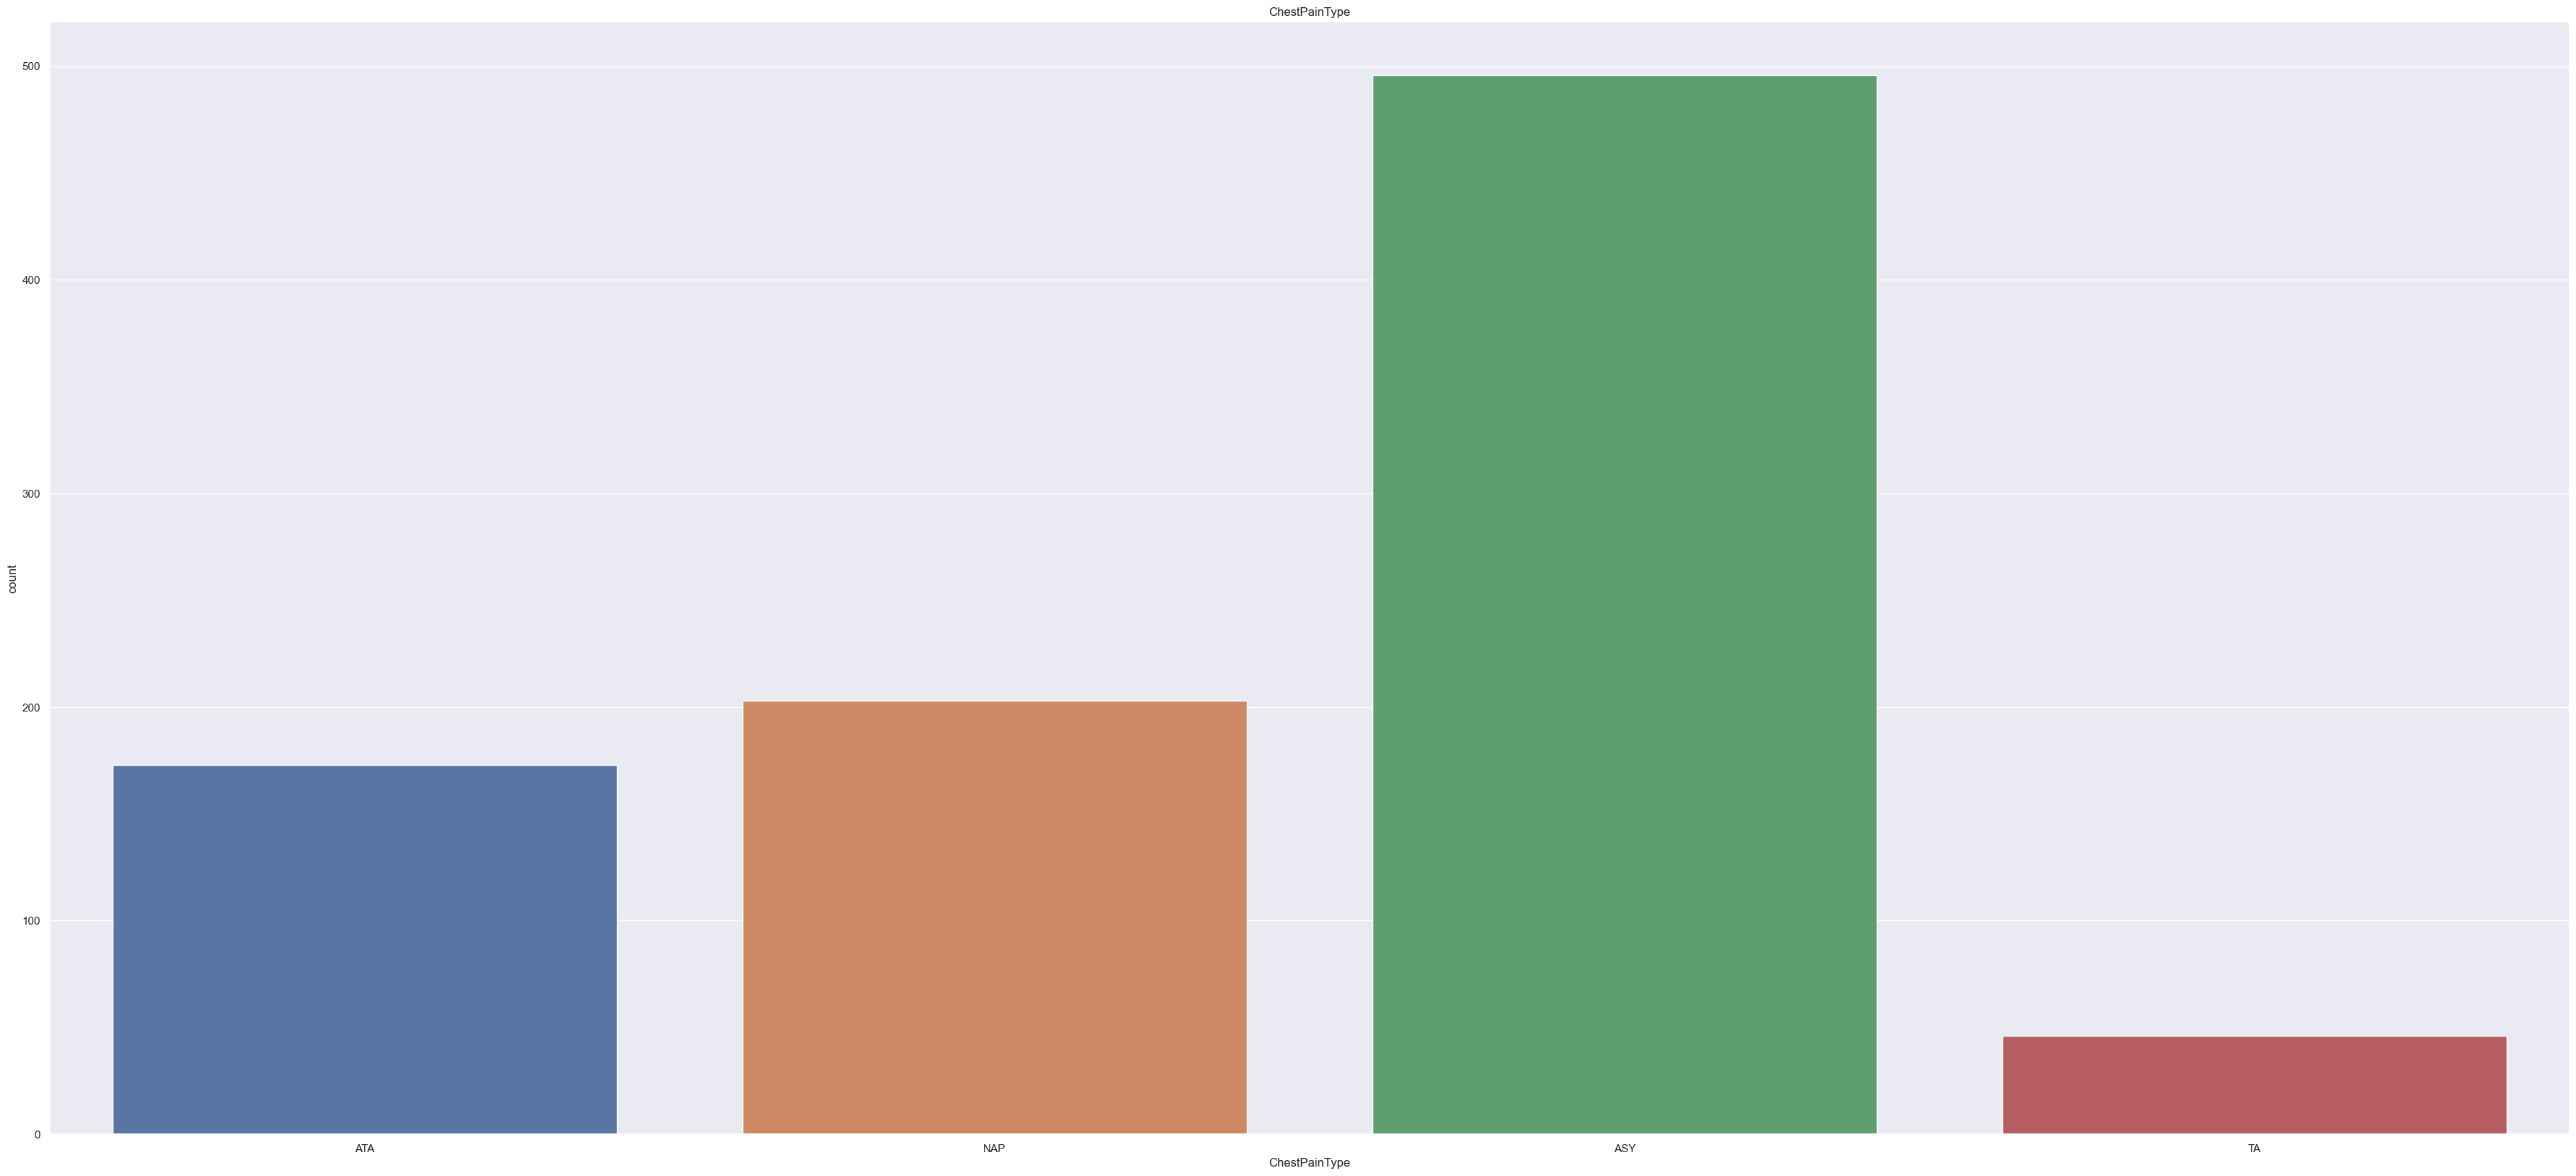

---------------------------------------------------------------------------------------------------------------
values of  RestingBP column
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
 


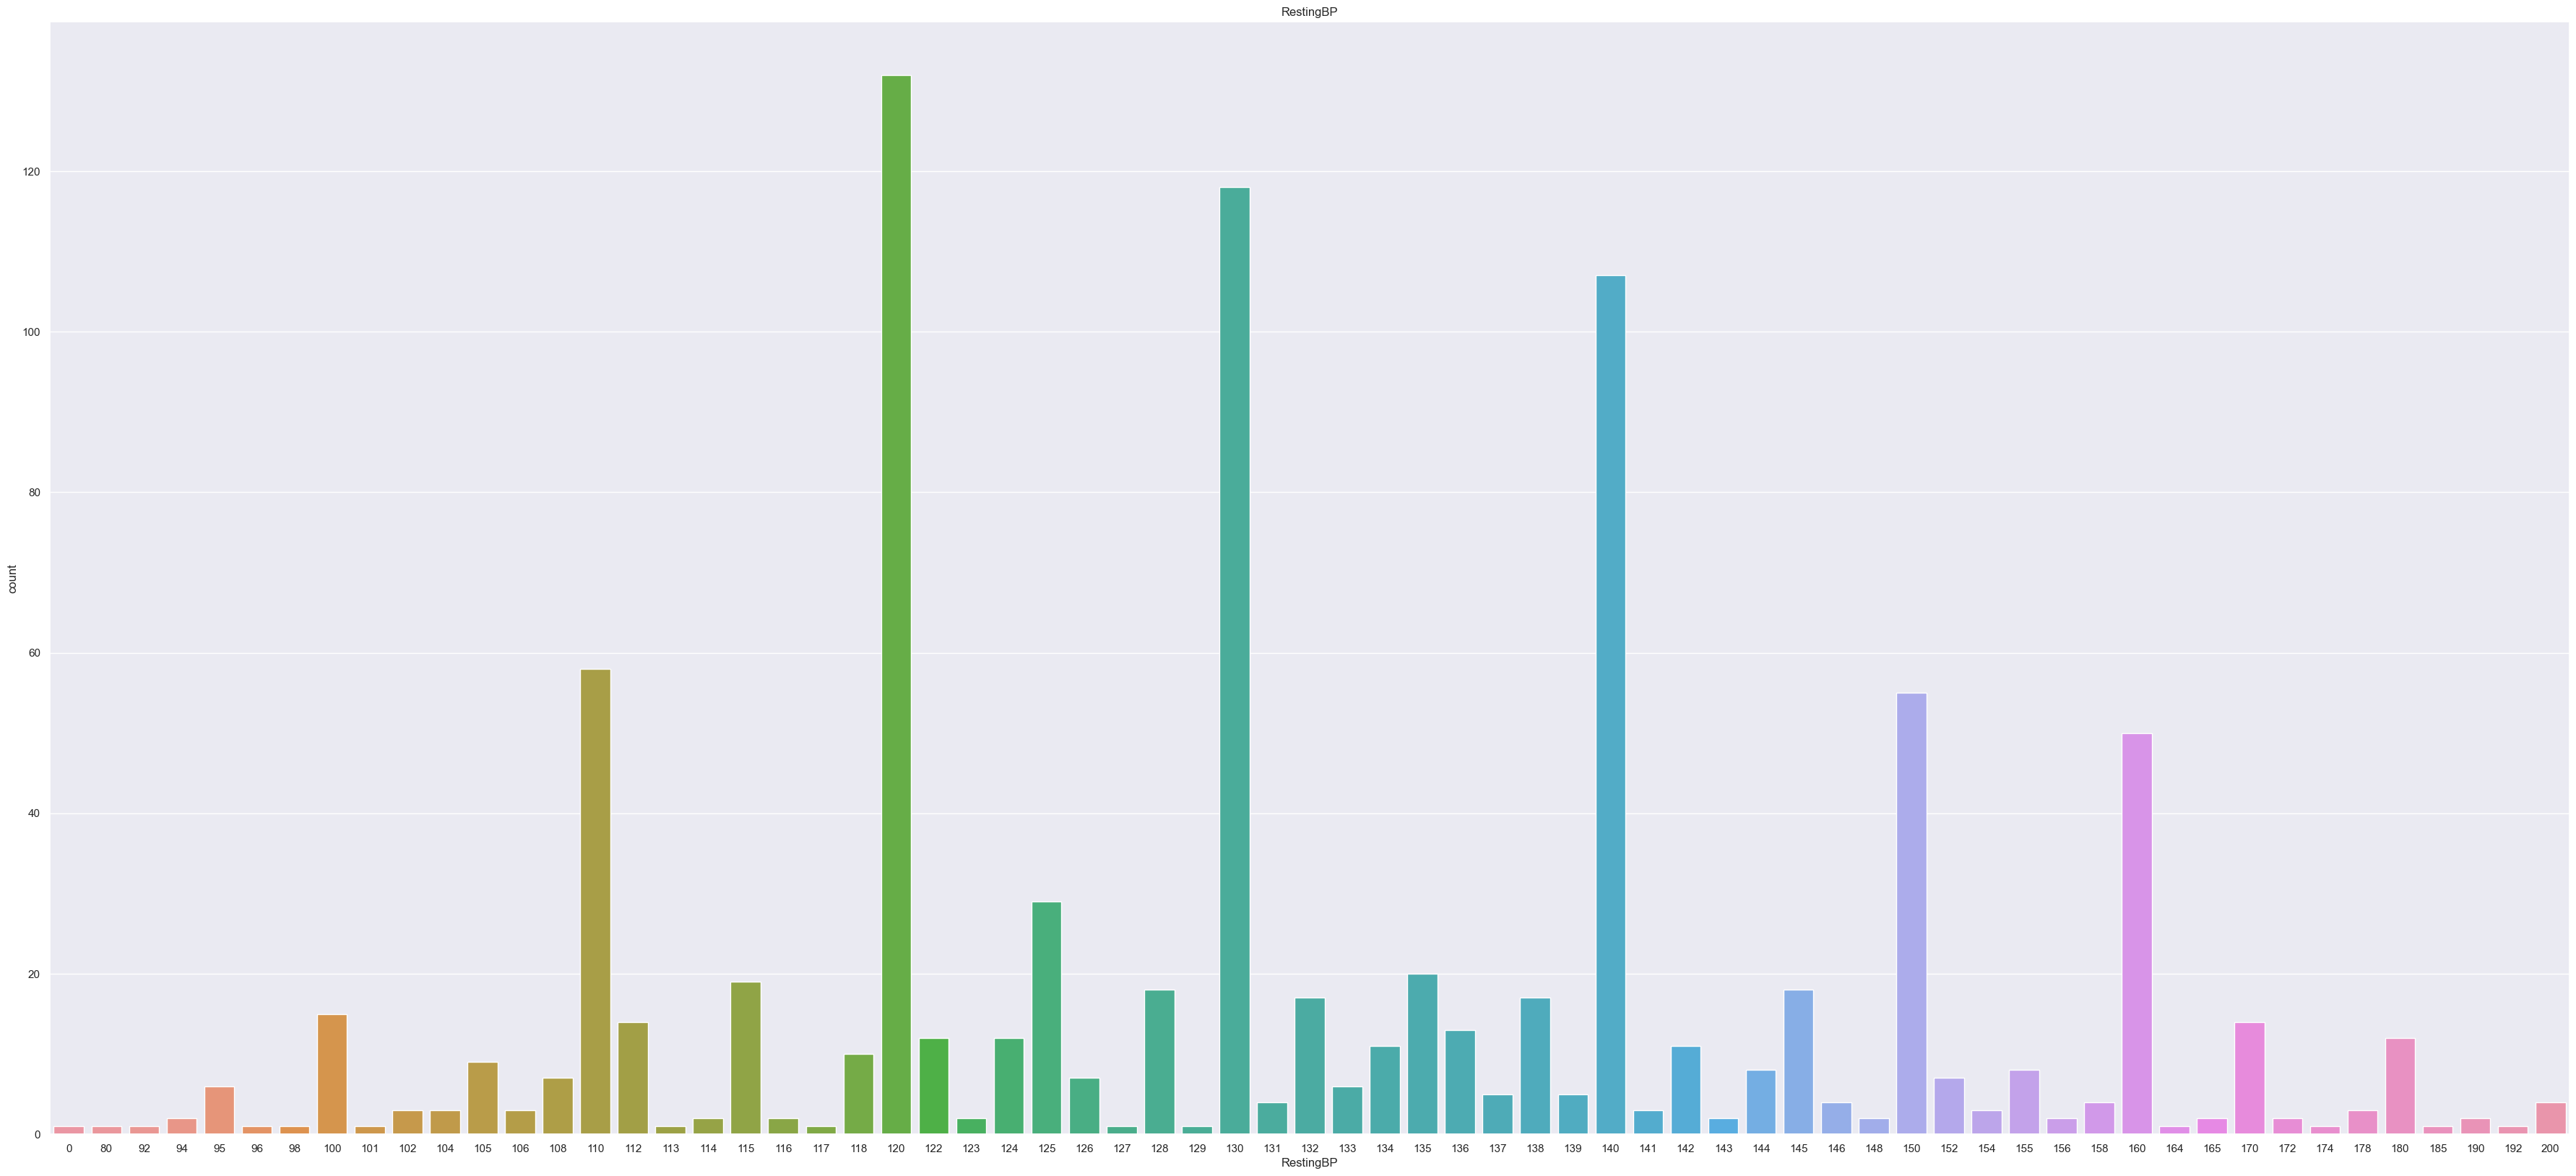

---------------------------------------------------------------------------------------------------------------
values of  Cholesterol column
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64
 


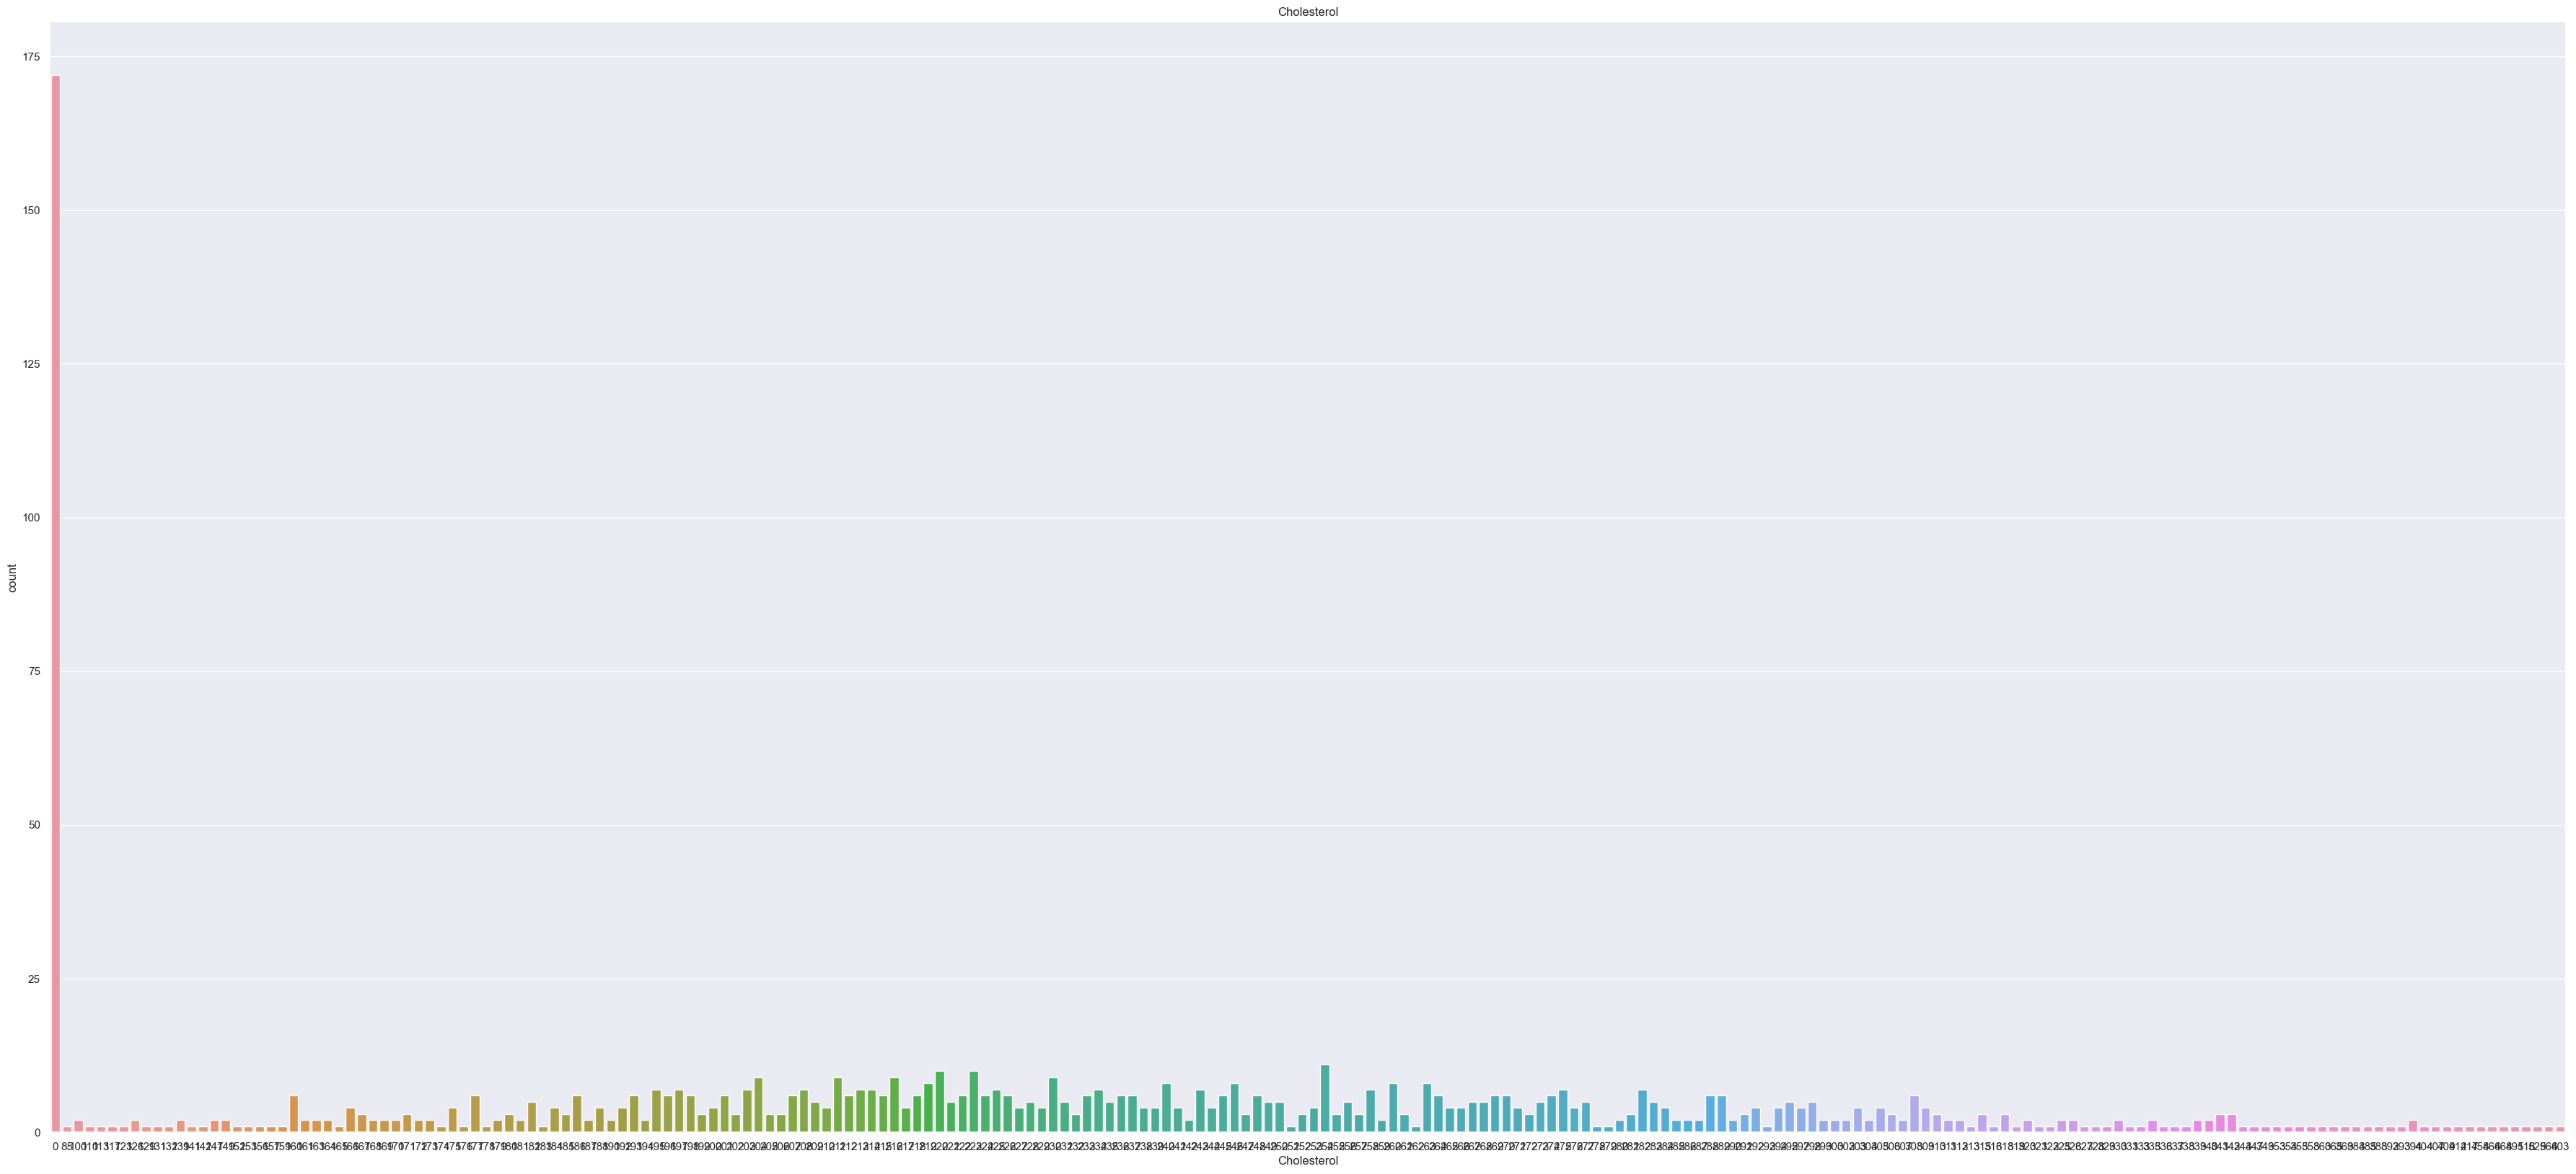

---------------------------------------------------------------------------------------------------------------
values of  FastingBS column
0    704
1    214
Name: FastingBS, dtype: int64
 


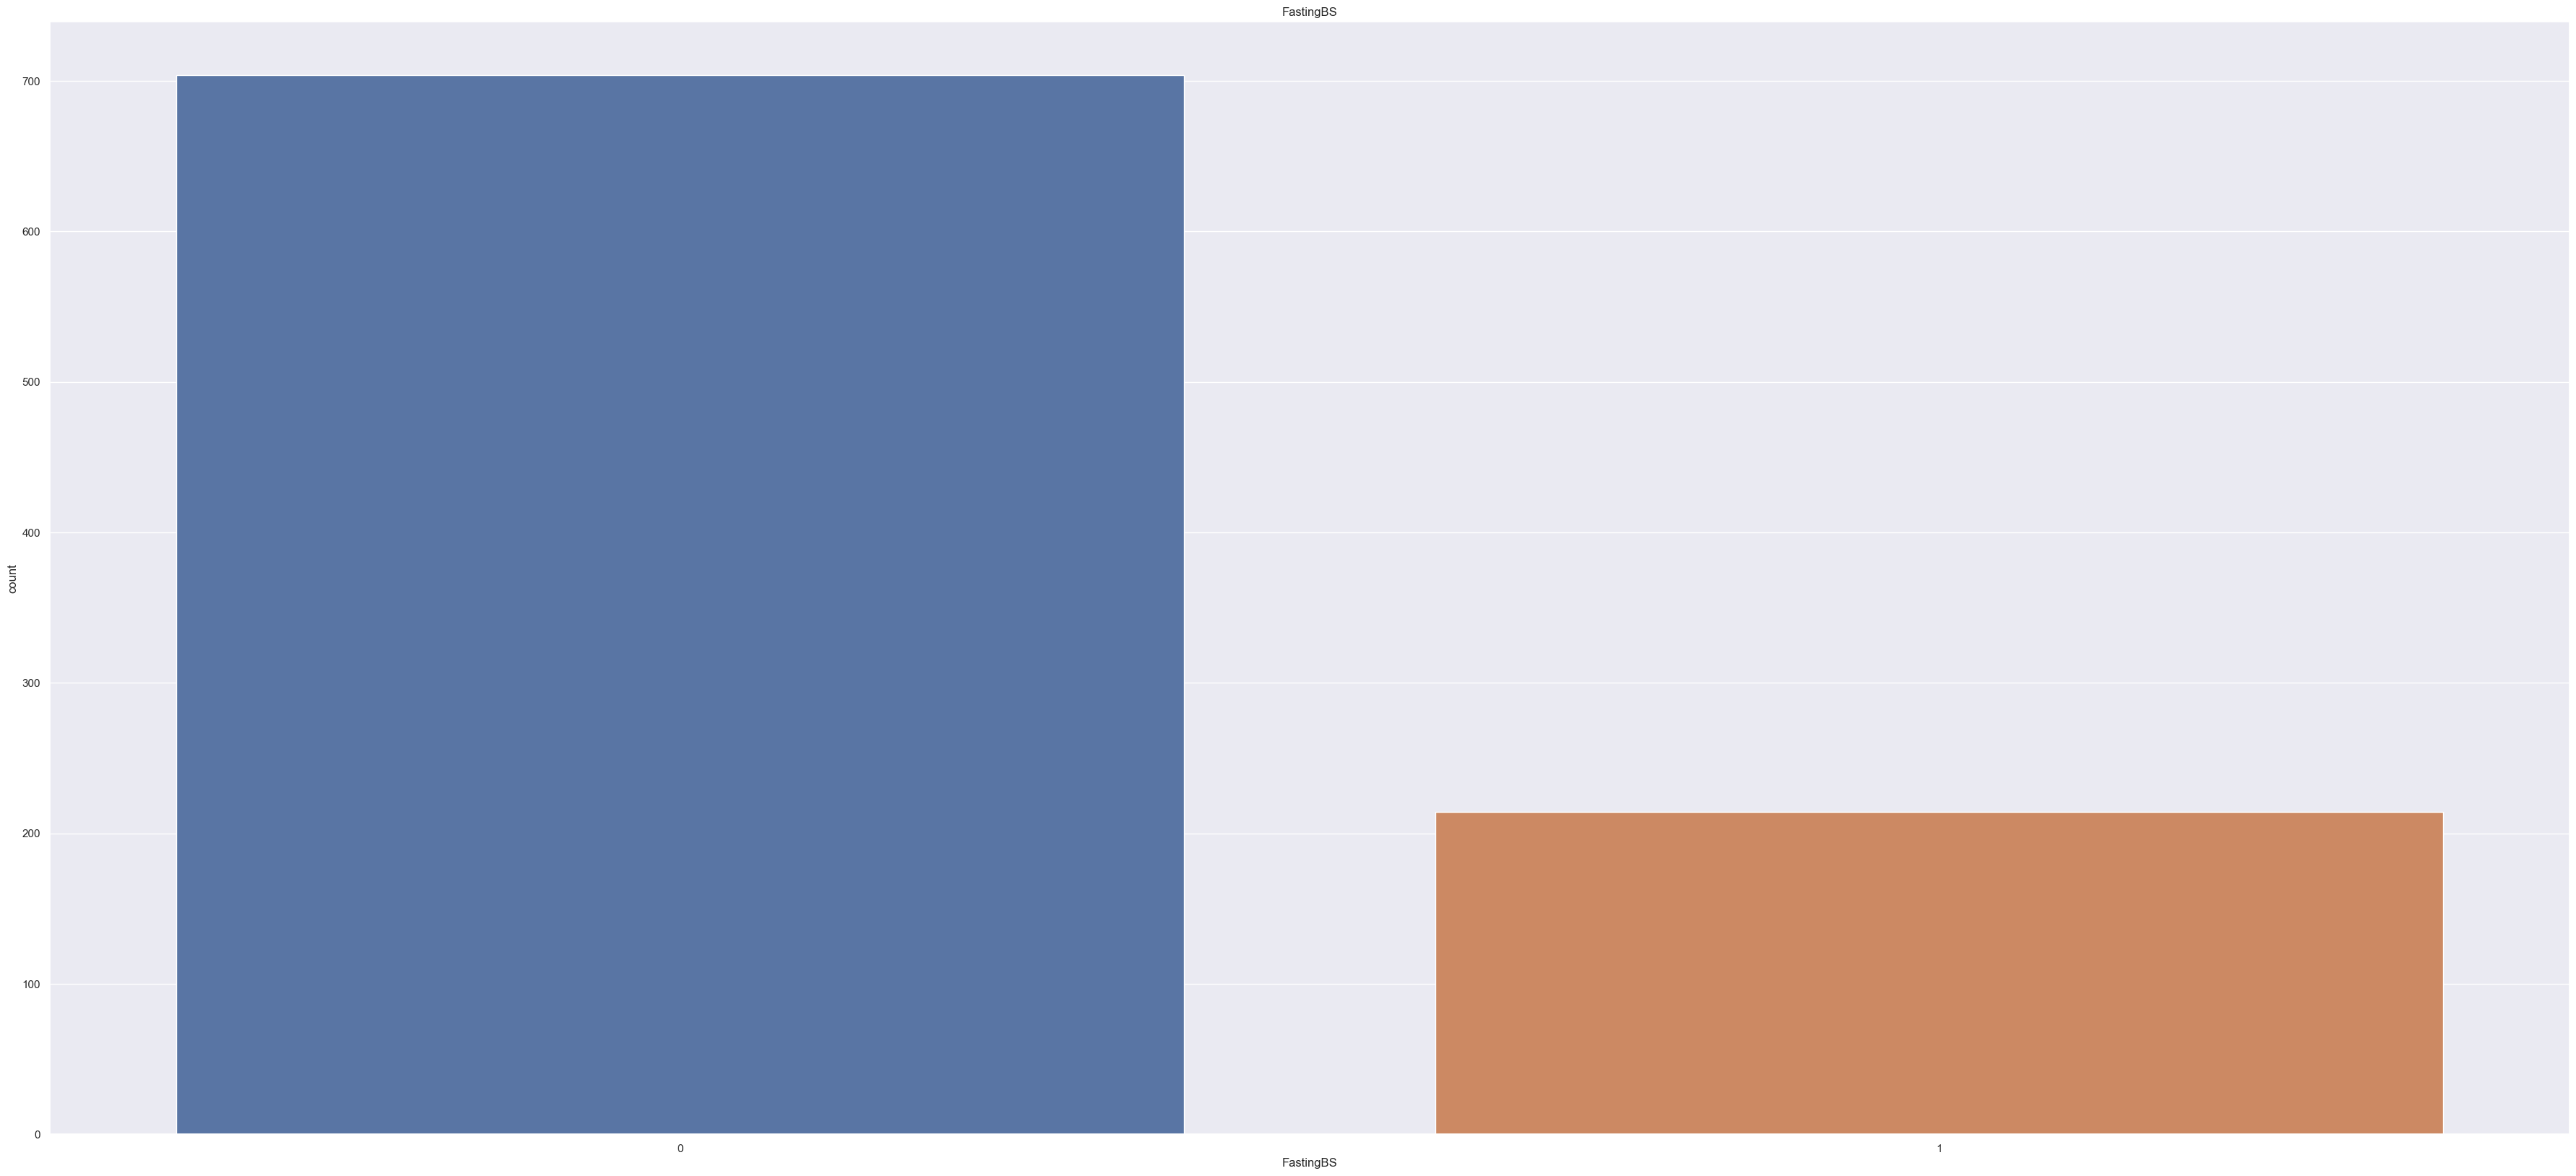

---------------------------------------------------------------------------------------------------------------
values of  RestingECG column
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
 


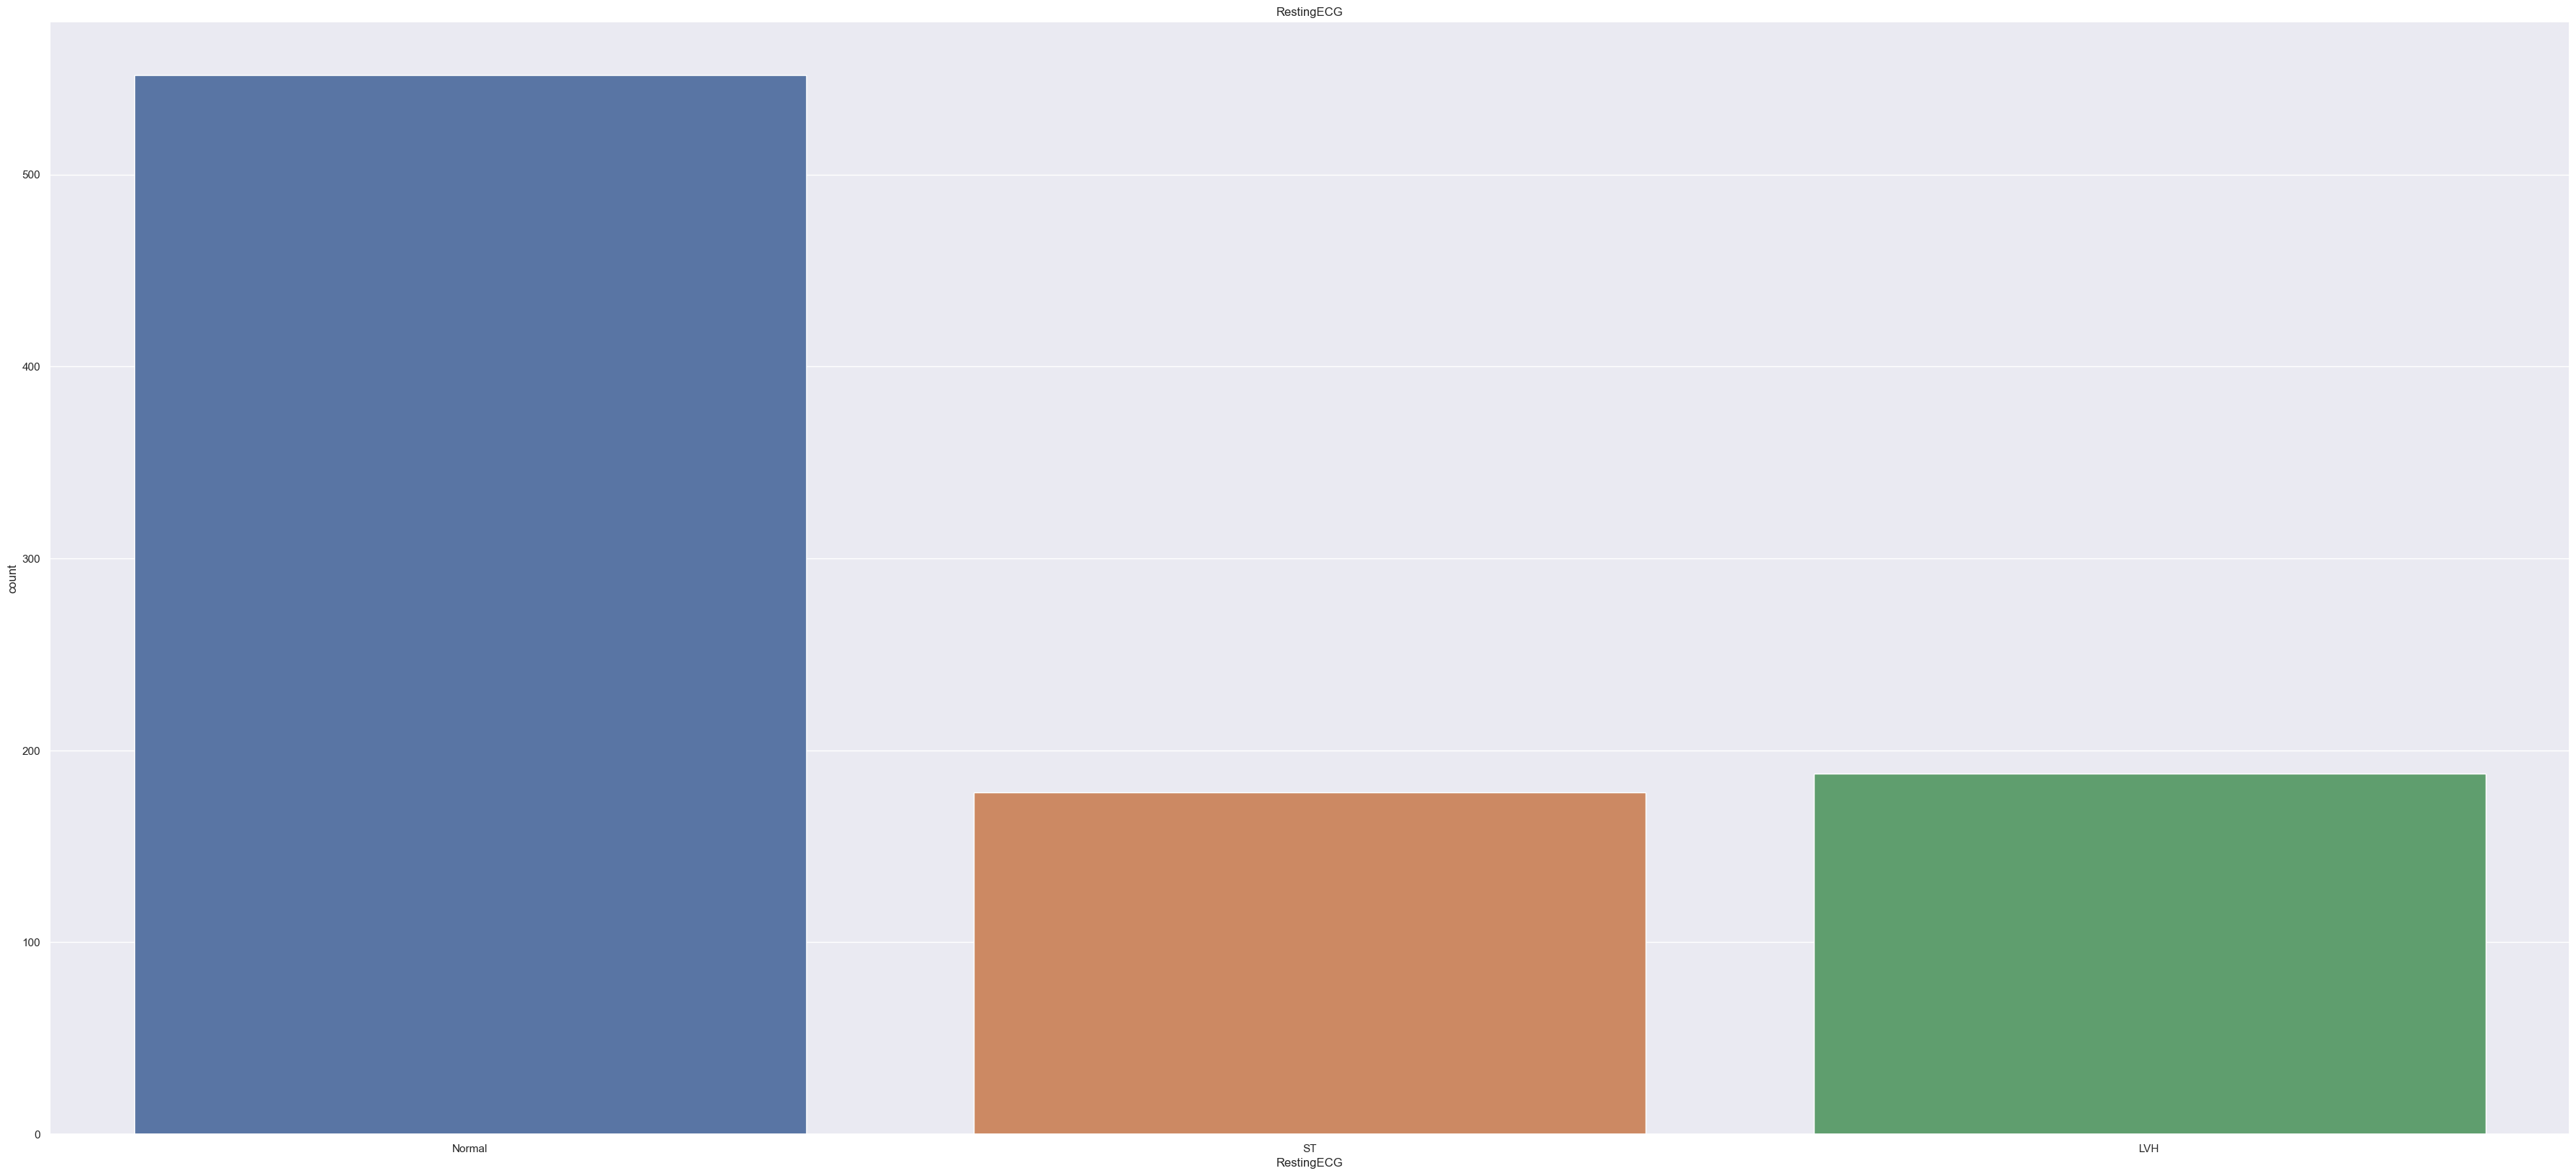

---------------------------------------------------------------------------------------------------------------
values of  MaxHR column
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64
 


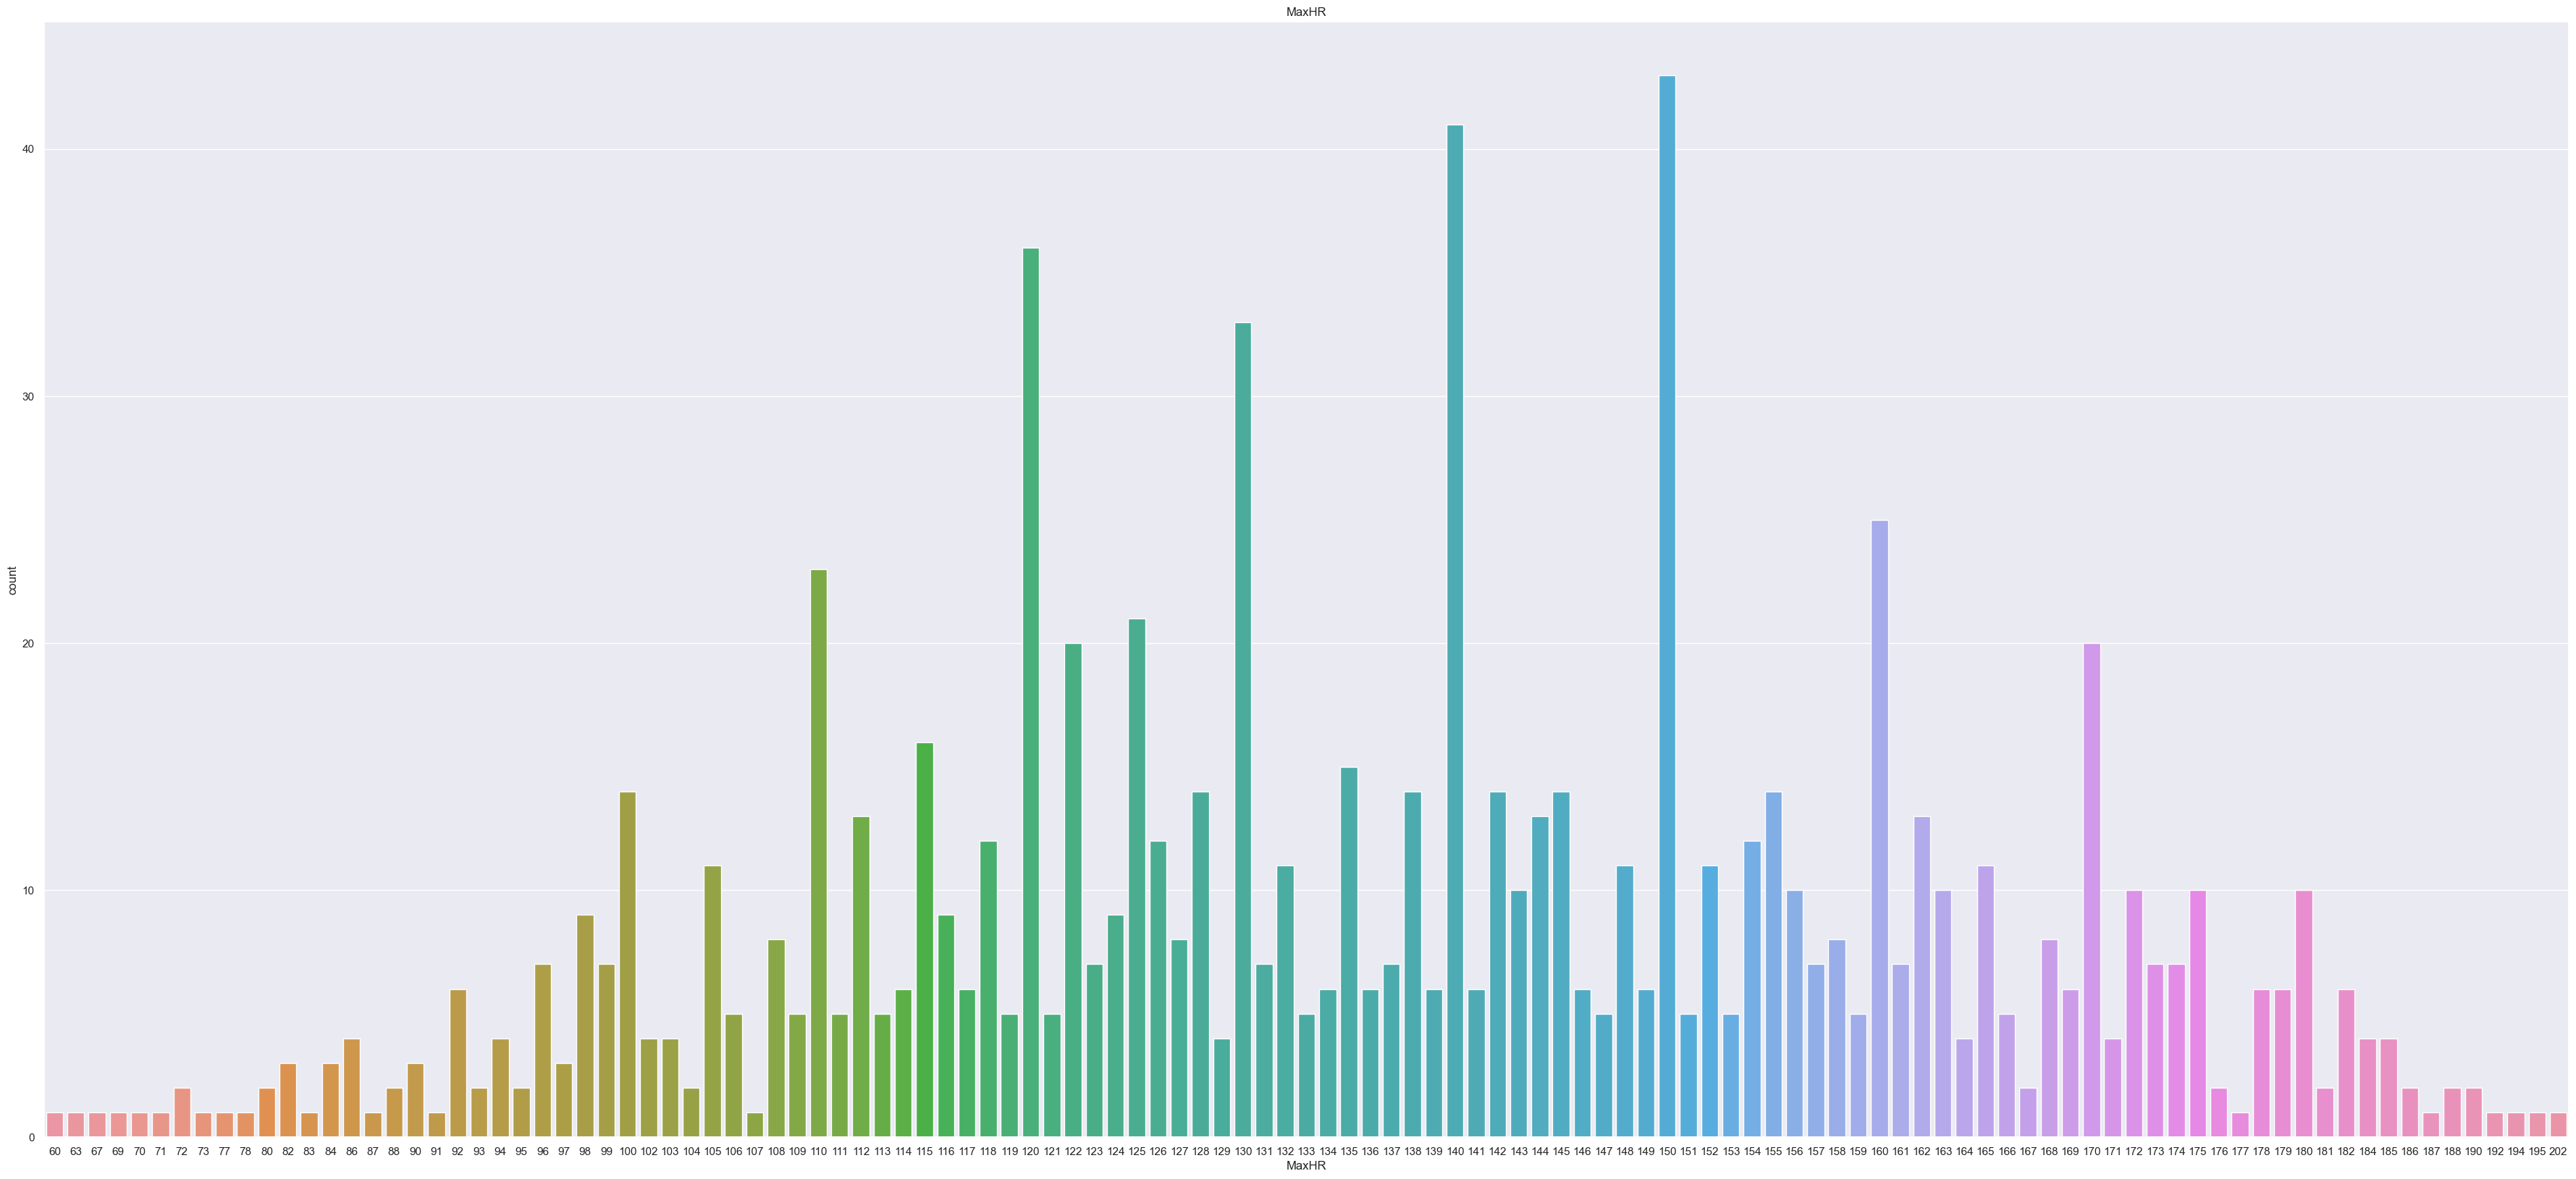

---------------------------------------------------------------------------------------------------------------
values of  ExerciseAngina column
N    547
Y    371
Name: ExerciseAngina, dtype: int64
 


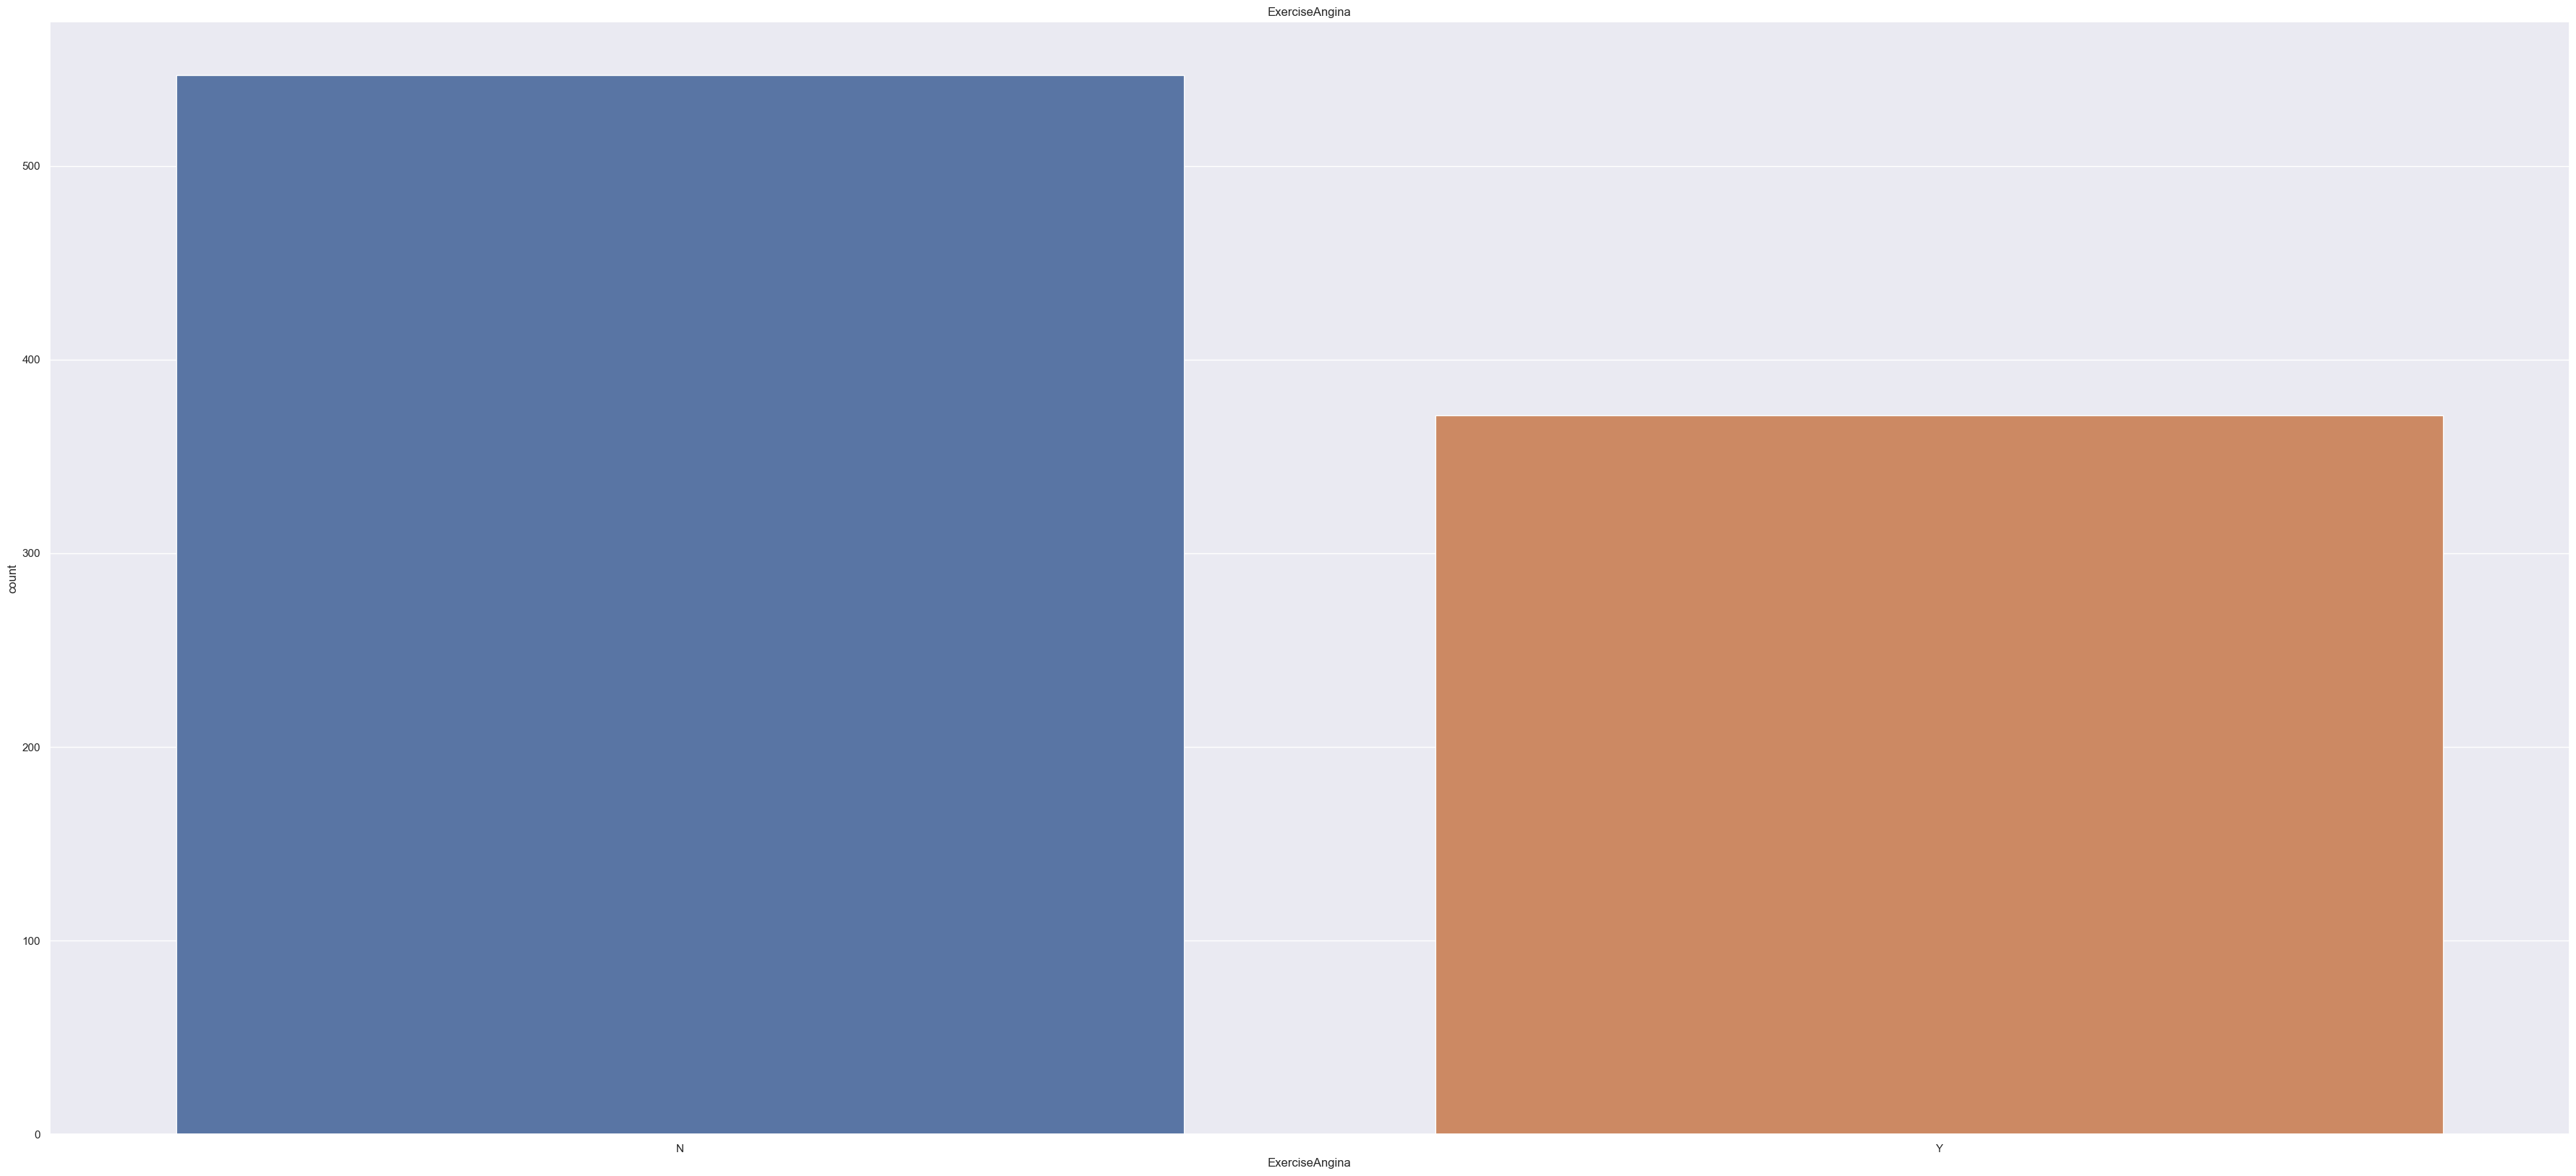

---------------------------------------------------------------------------------------------------------------
values of  Oldpeak column
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64
 


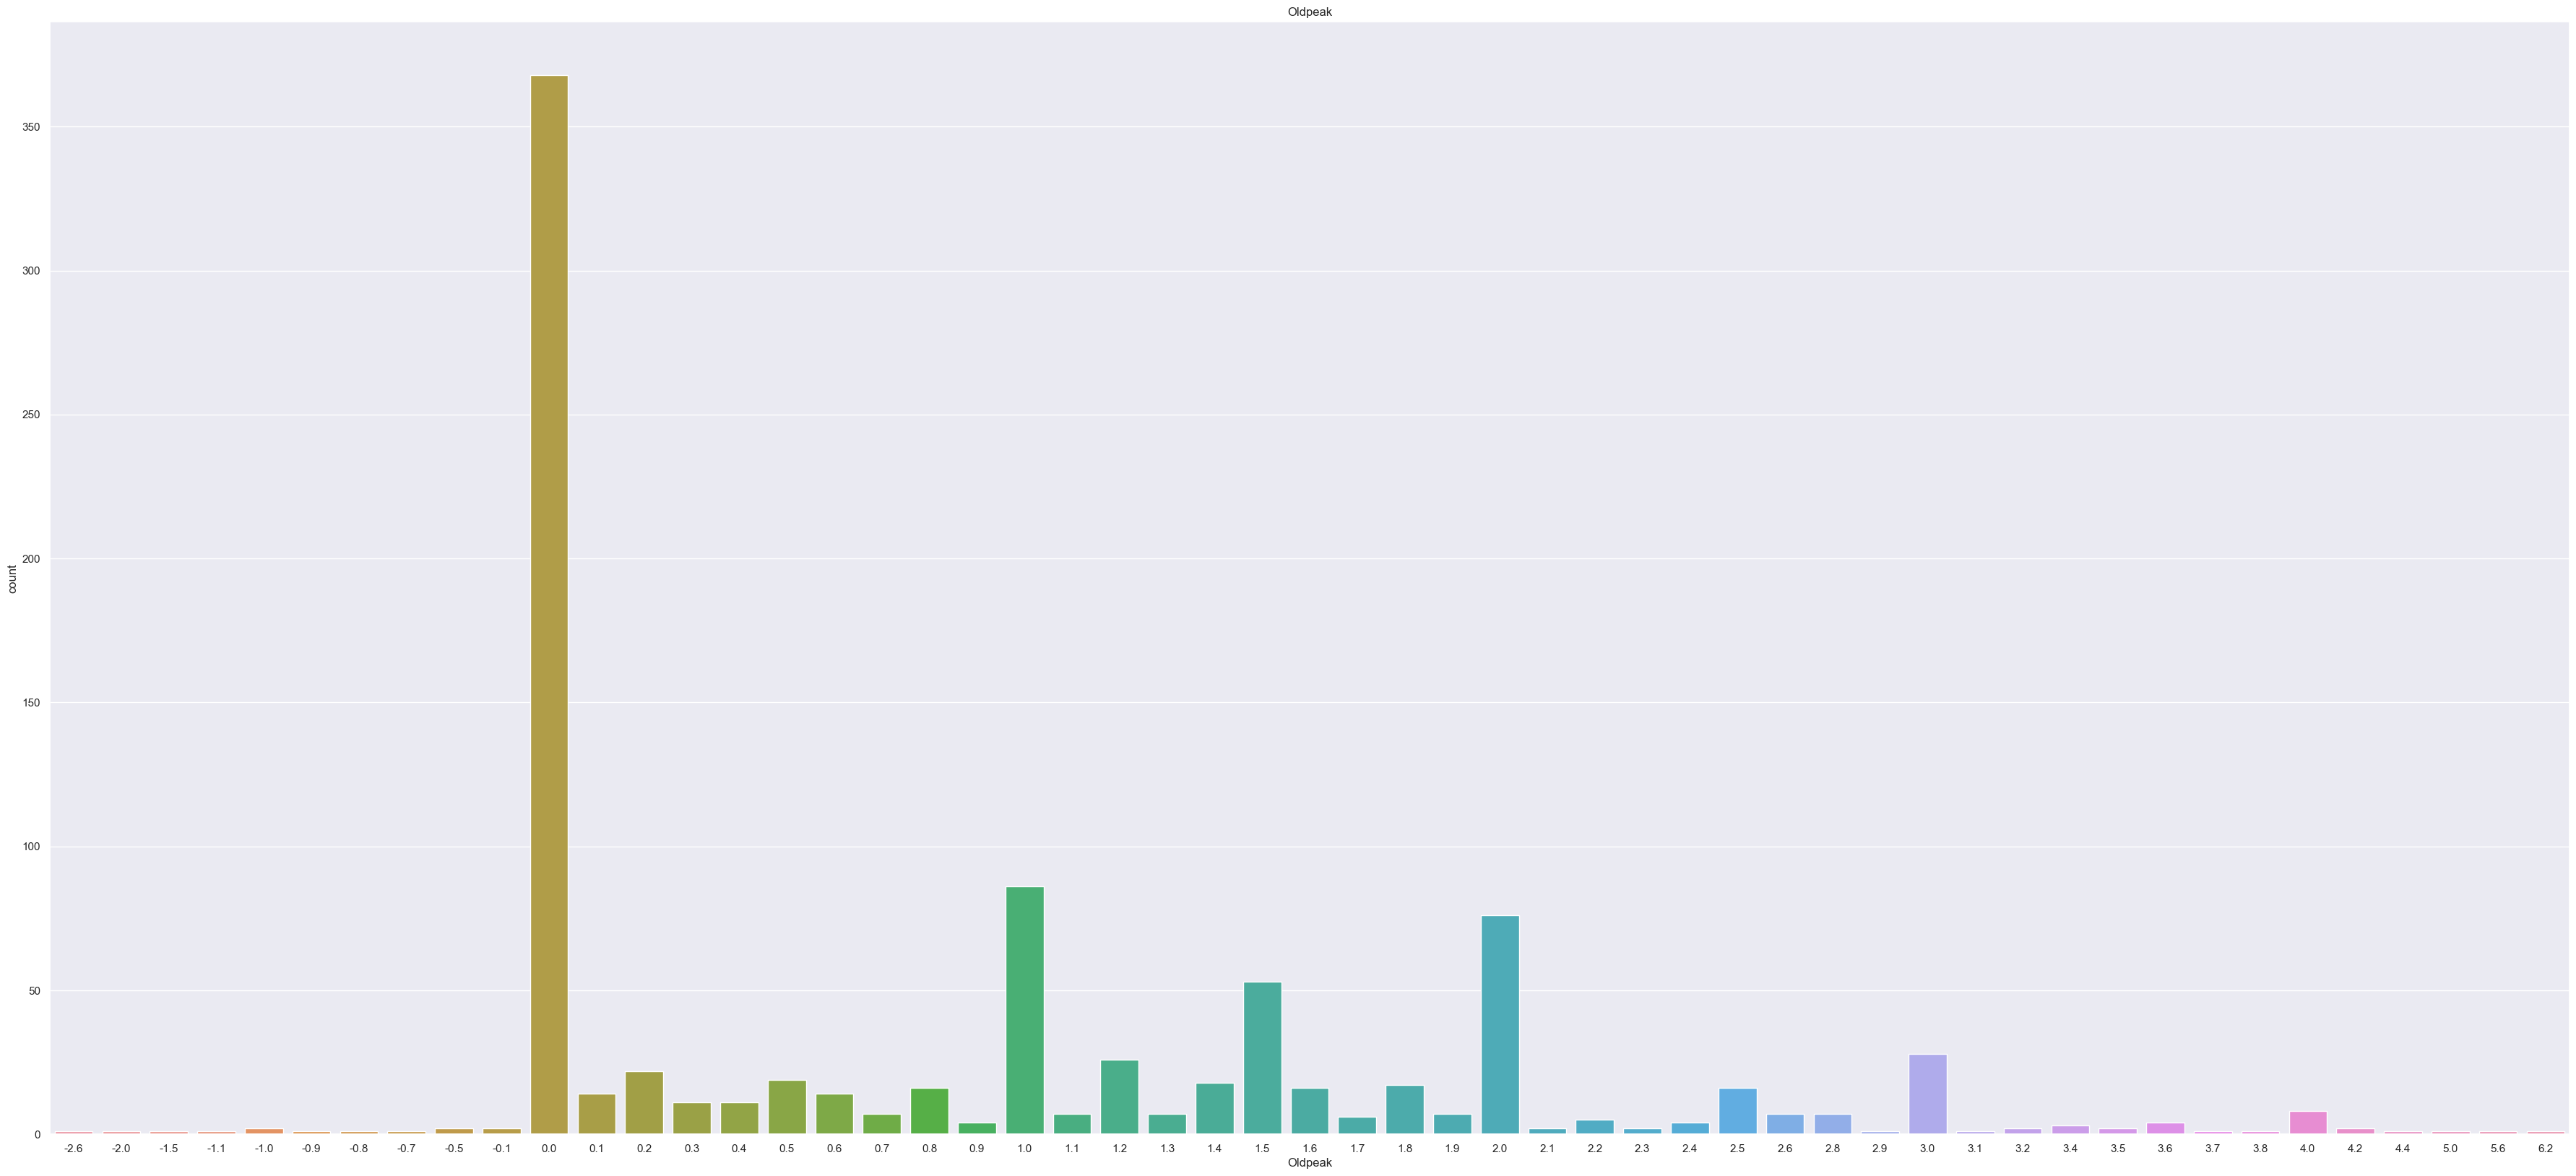

---------------------------------------------------------------------------------------------------------------
values of  ST_Slope column
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
 


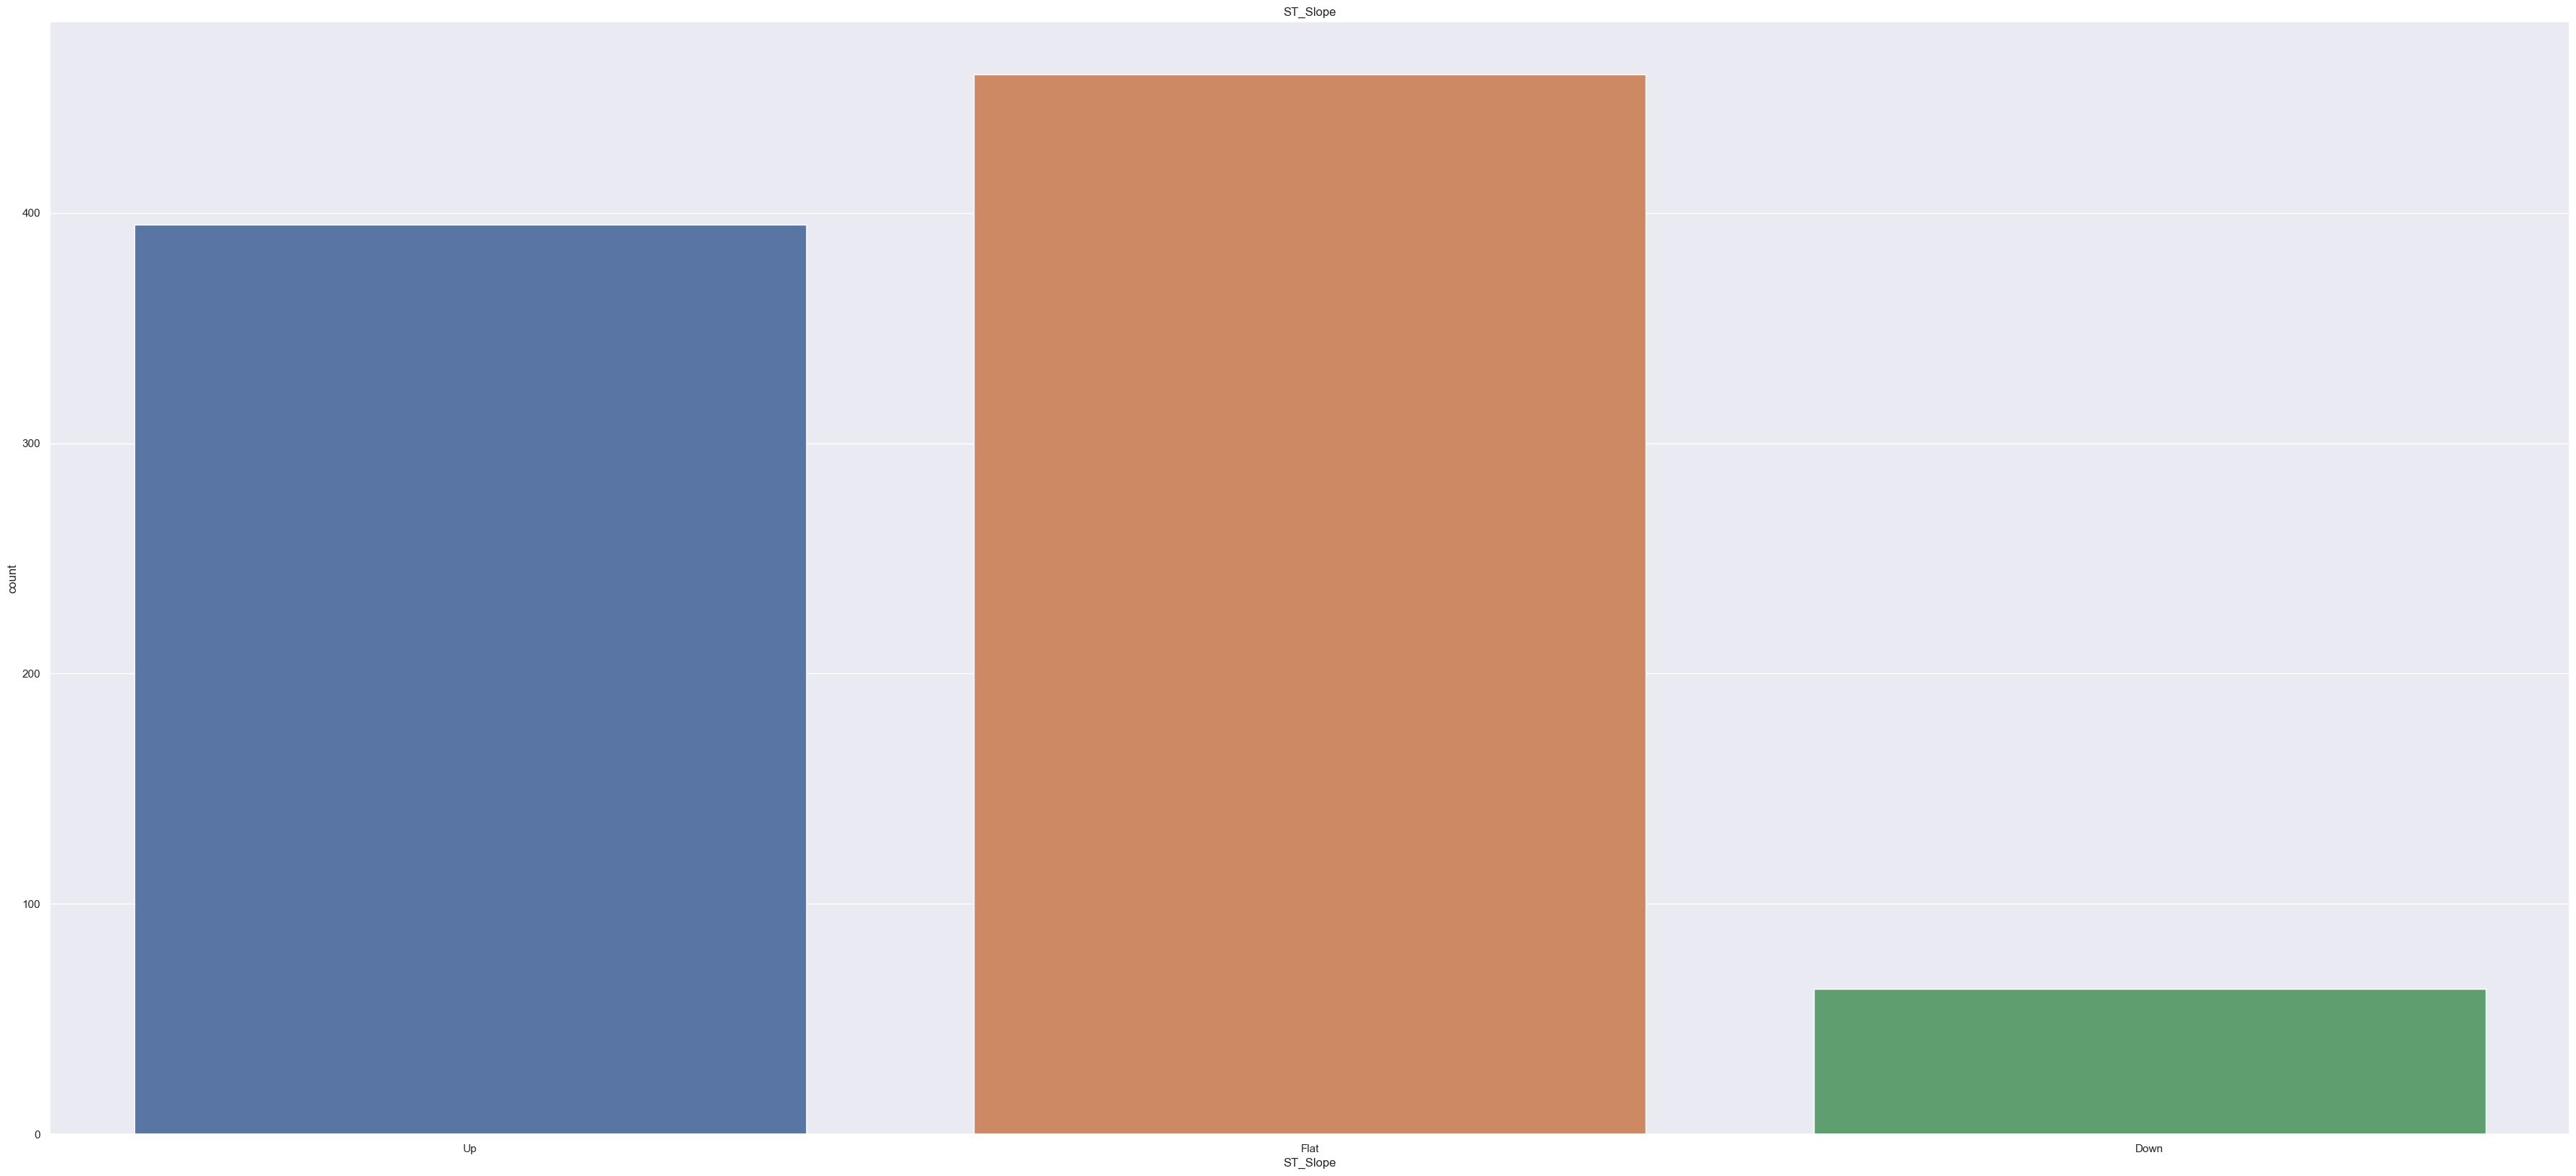

---------------------------------------------------------------------------------------------------------------
values of  HeartDisease column
1    508
0    410
Name: HeartDisease, dtype: int64
 


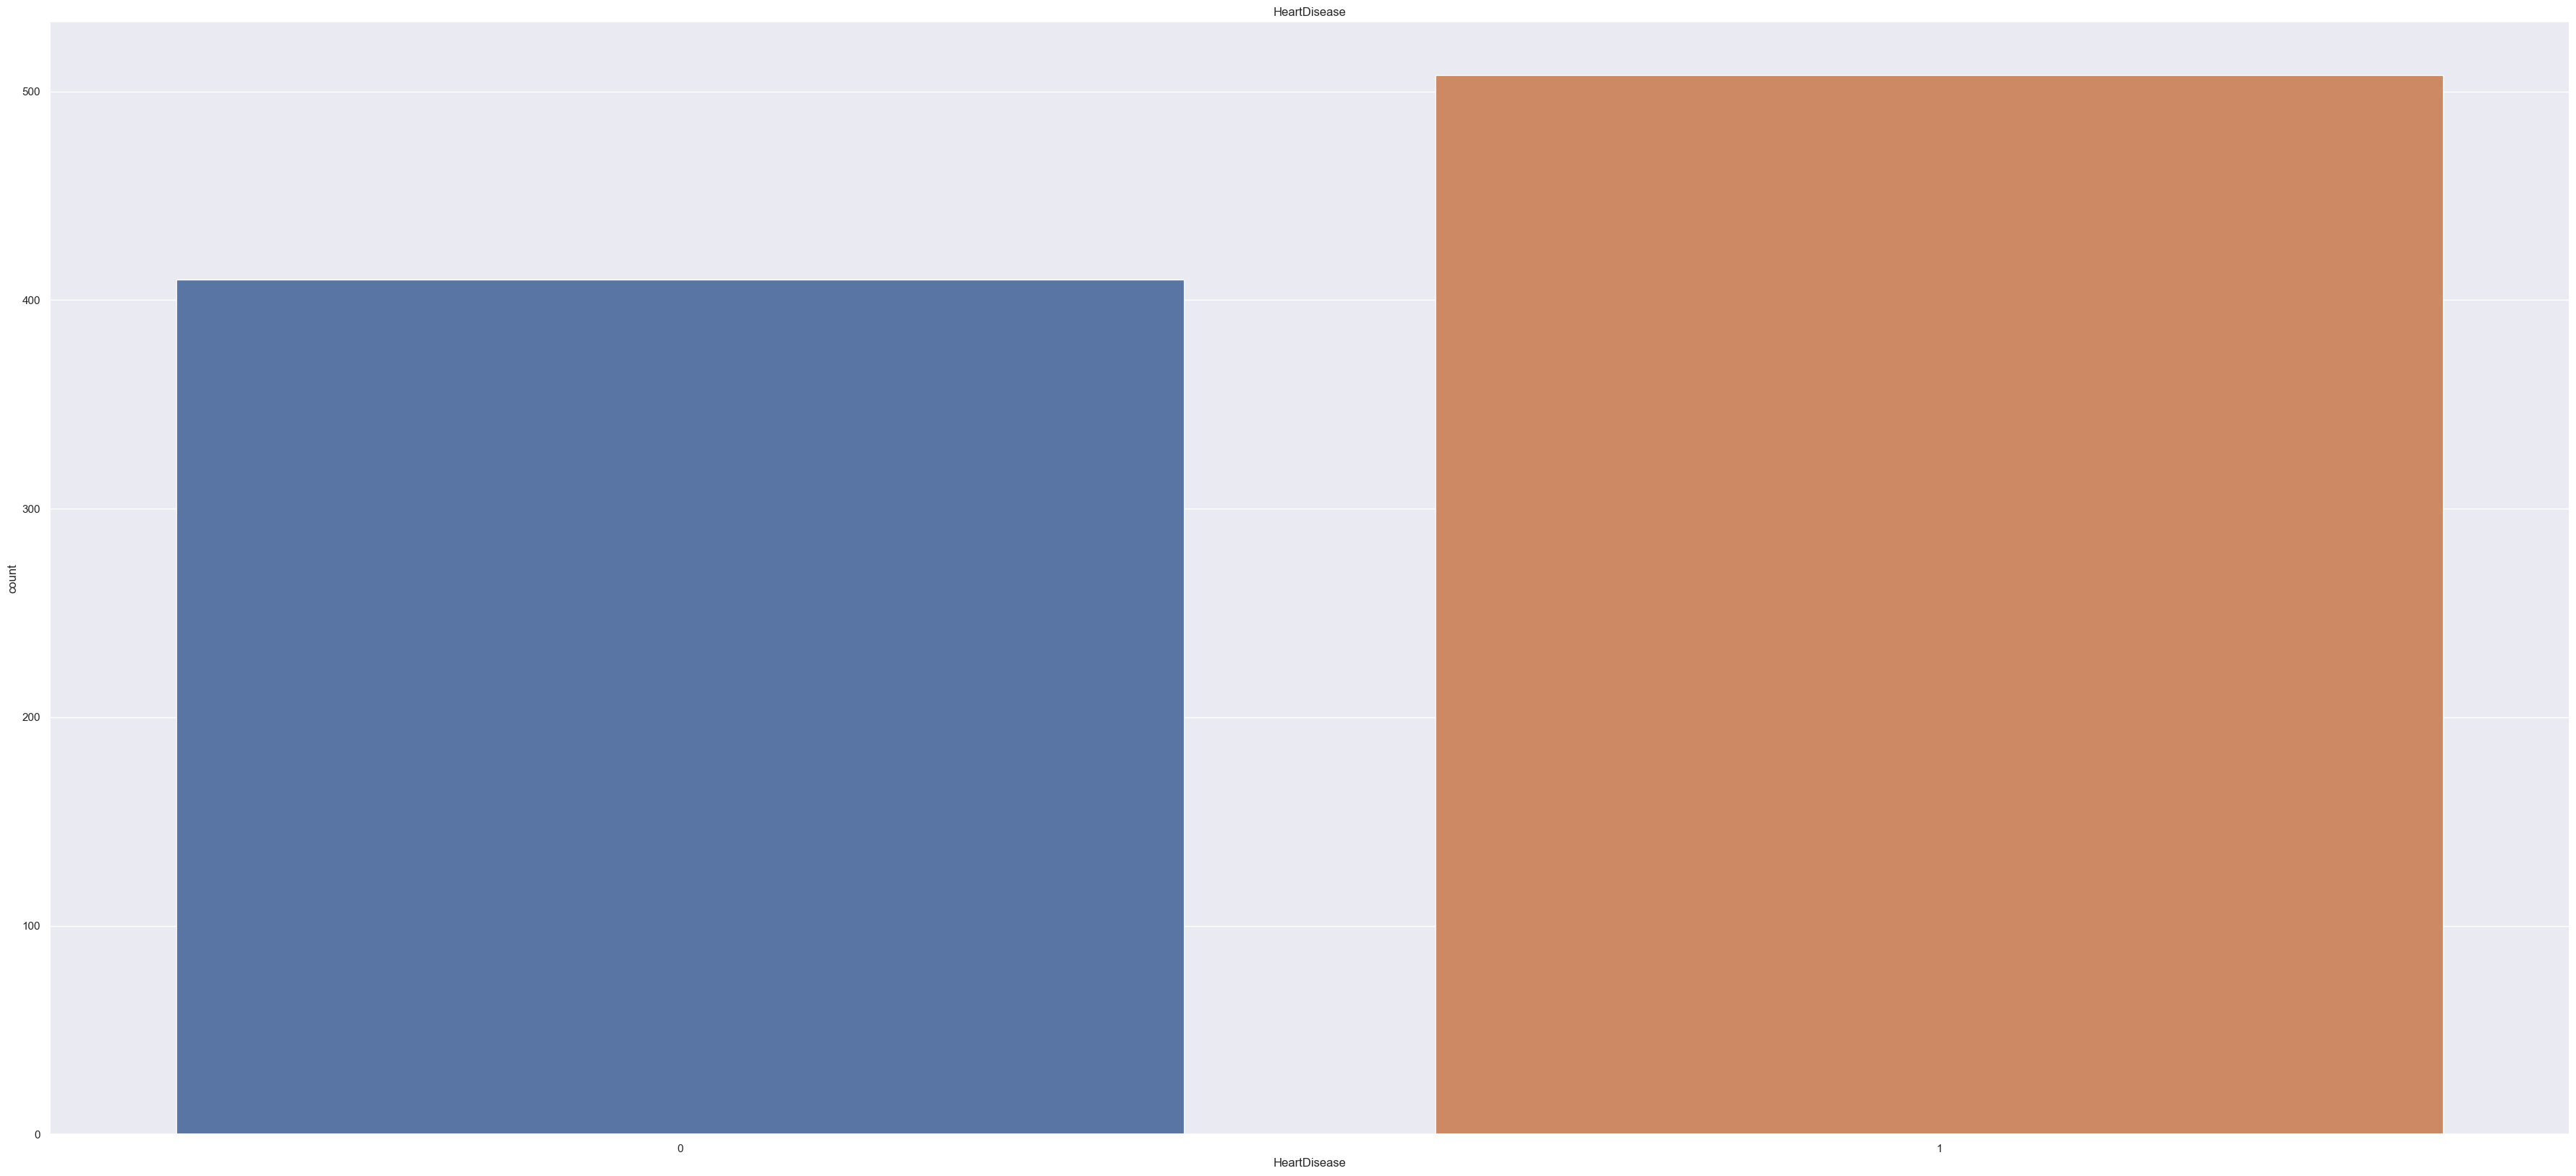

---------------------------------------------------------------------------------------------------------------


In [78]:
c = df.columns

for i in c:
    print("values of ", i, "column")
    print(df[i].value_counts())
    print(" ")
    sns.set()
    plt.figure(figsize = (45, 20))
    plt.title(i)
    sns.countplot(x = i, data = df)
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------")

boxplot about  Age  column


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


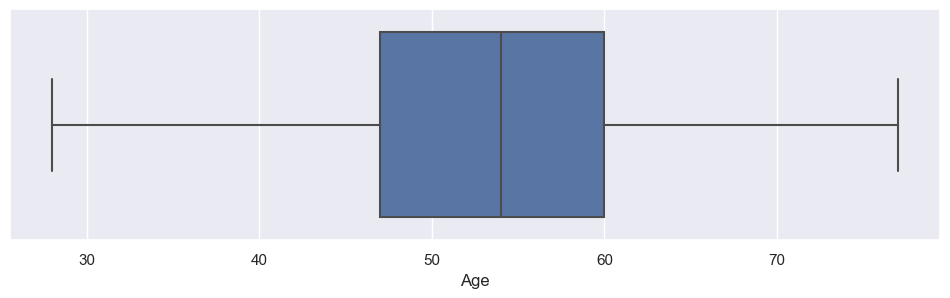

boxplot about  RestingBP  column


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


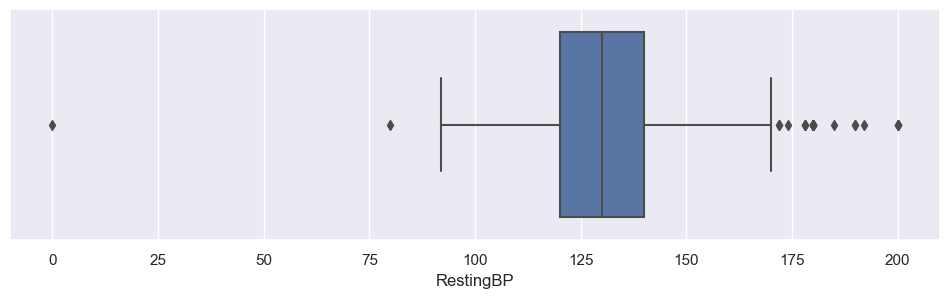

boxplot about  Cholesterol  column


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


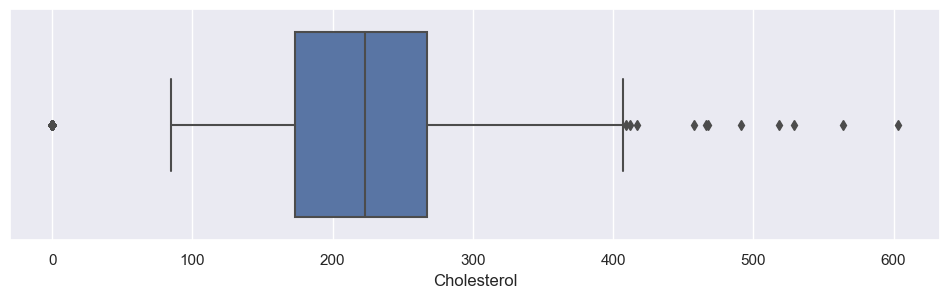

boxplot about  FastingBS  column


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


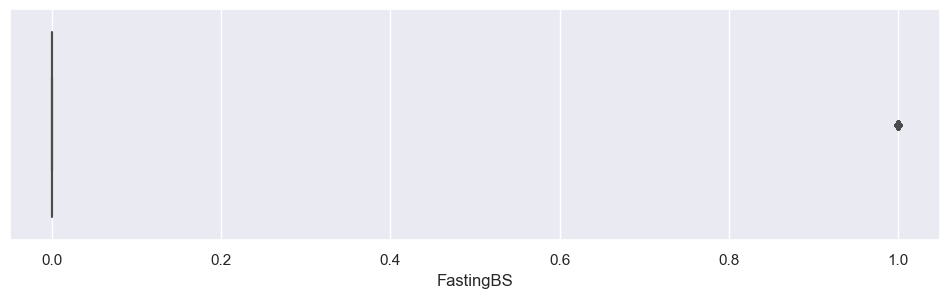

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


boxplot about  MaxHR  column


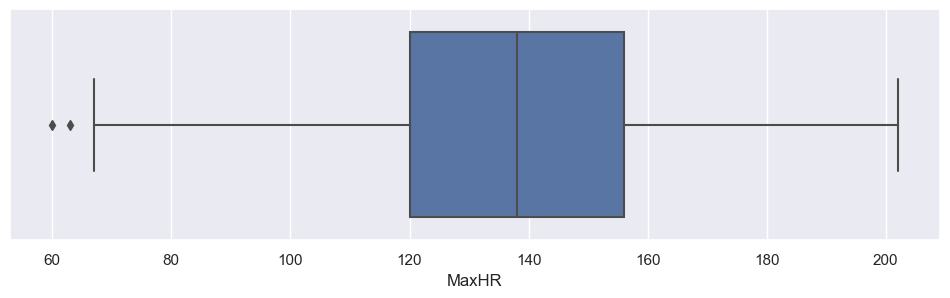

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


boxplot about  Oldpeak  column


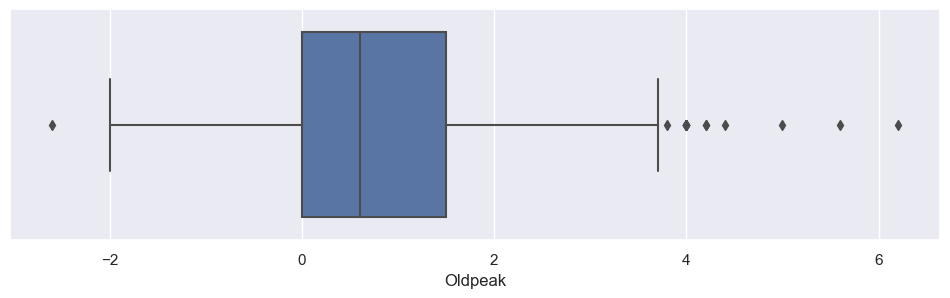

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


boxplot about  HeartDisease  column


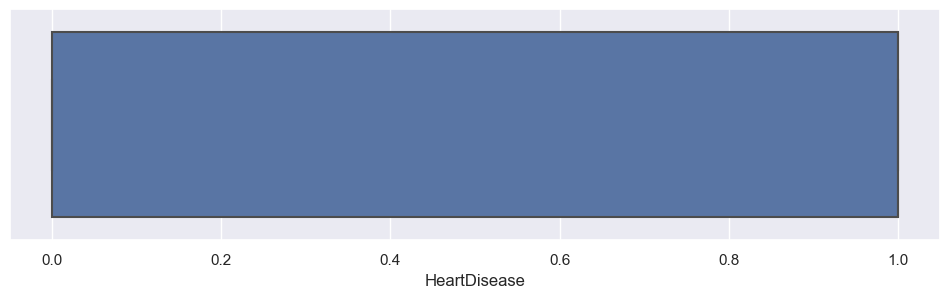

In [79]:
c = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

for i in c:
    print("boxplot about ", i, " column")
    sns.set()
    plt.figure(figsize = (12, 3))
    sns.boxplot(df[i])
    plt.show()

This dataset contain some outlier values.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

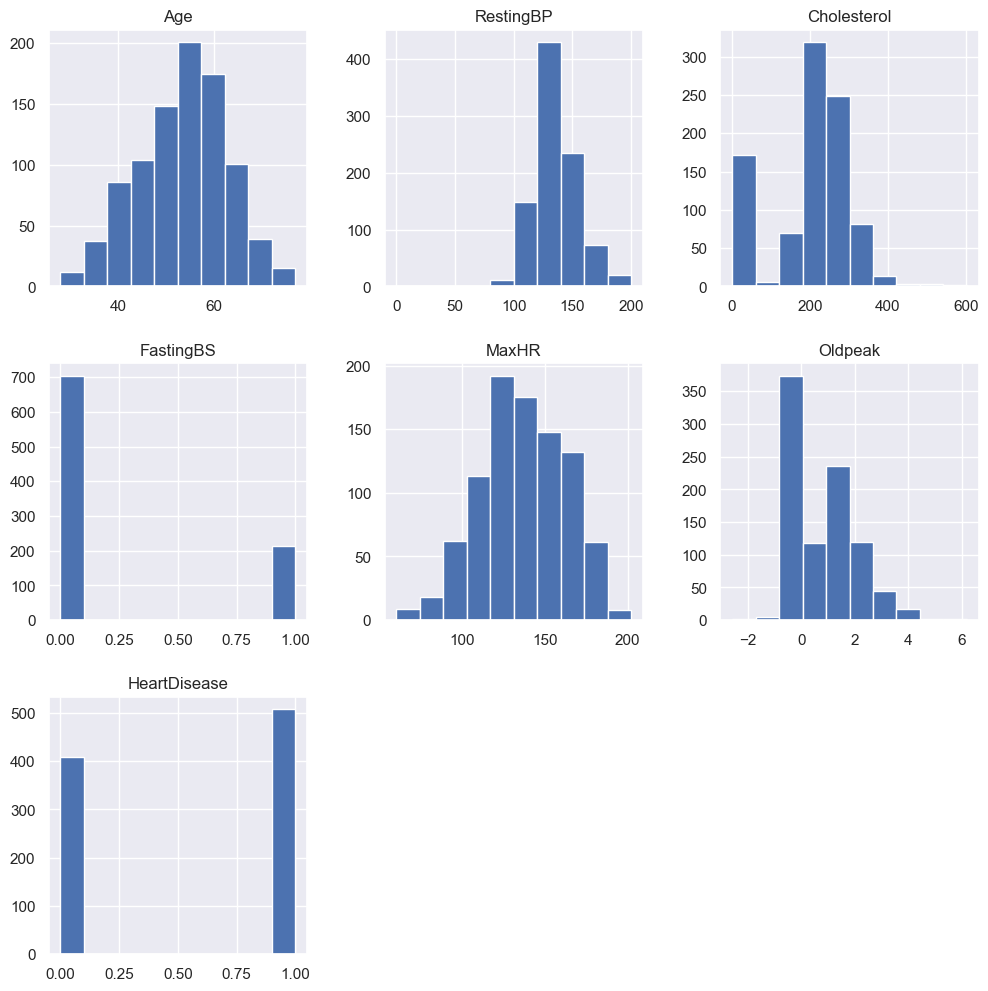

In [48]:
df.hist(figsize = (12, 12))

<Figure size 1500x1500 with 0 Axes>

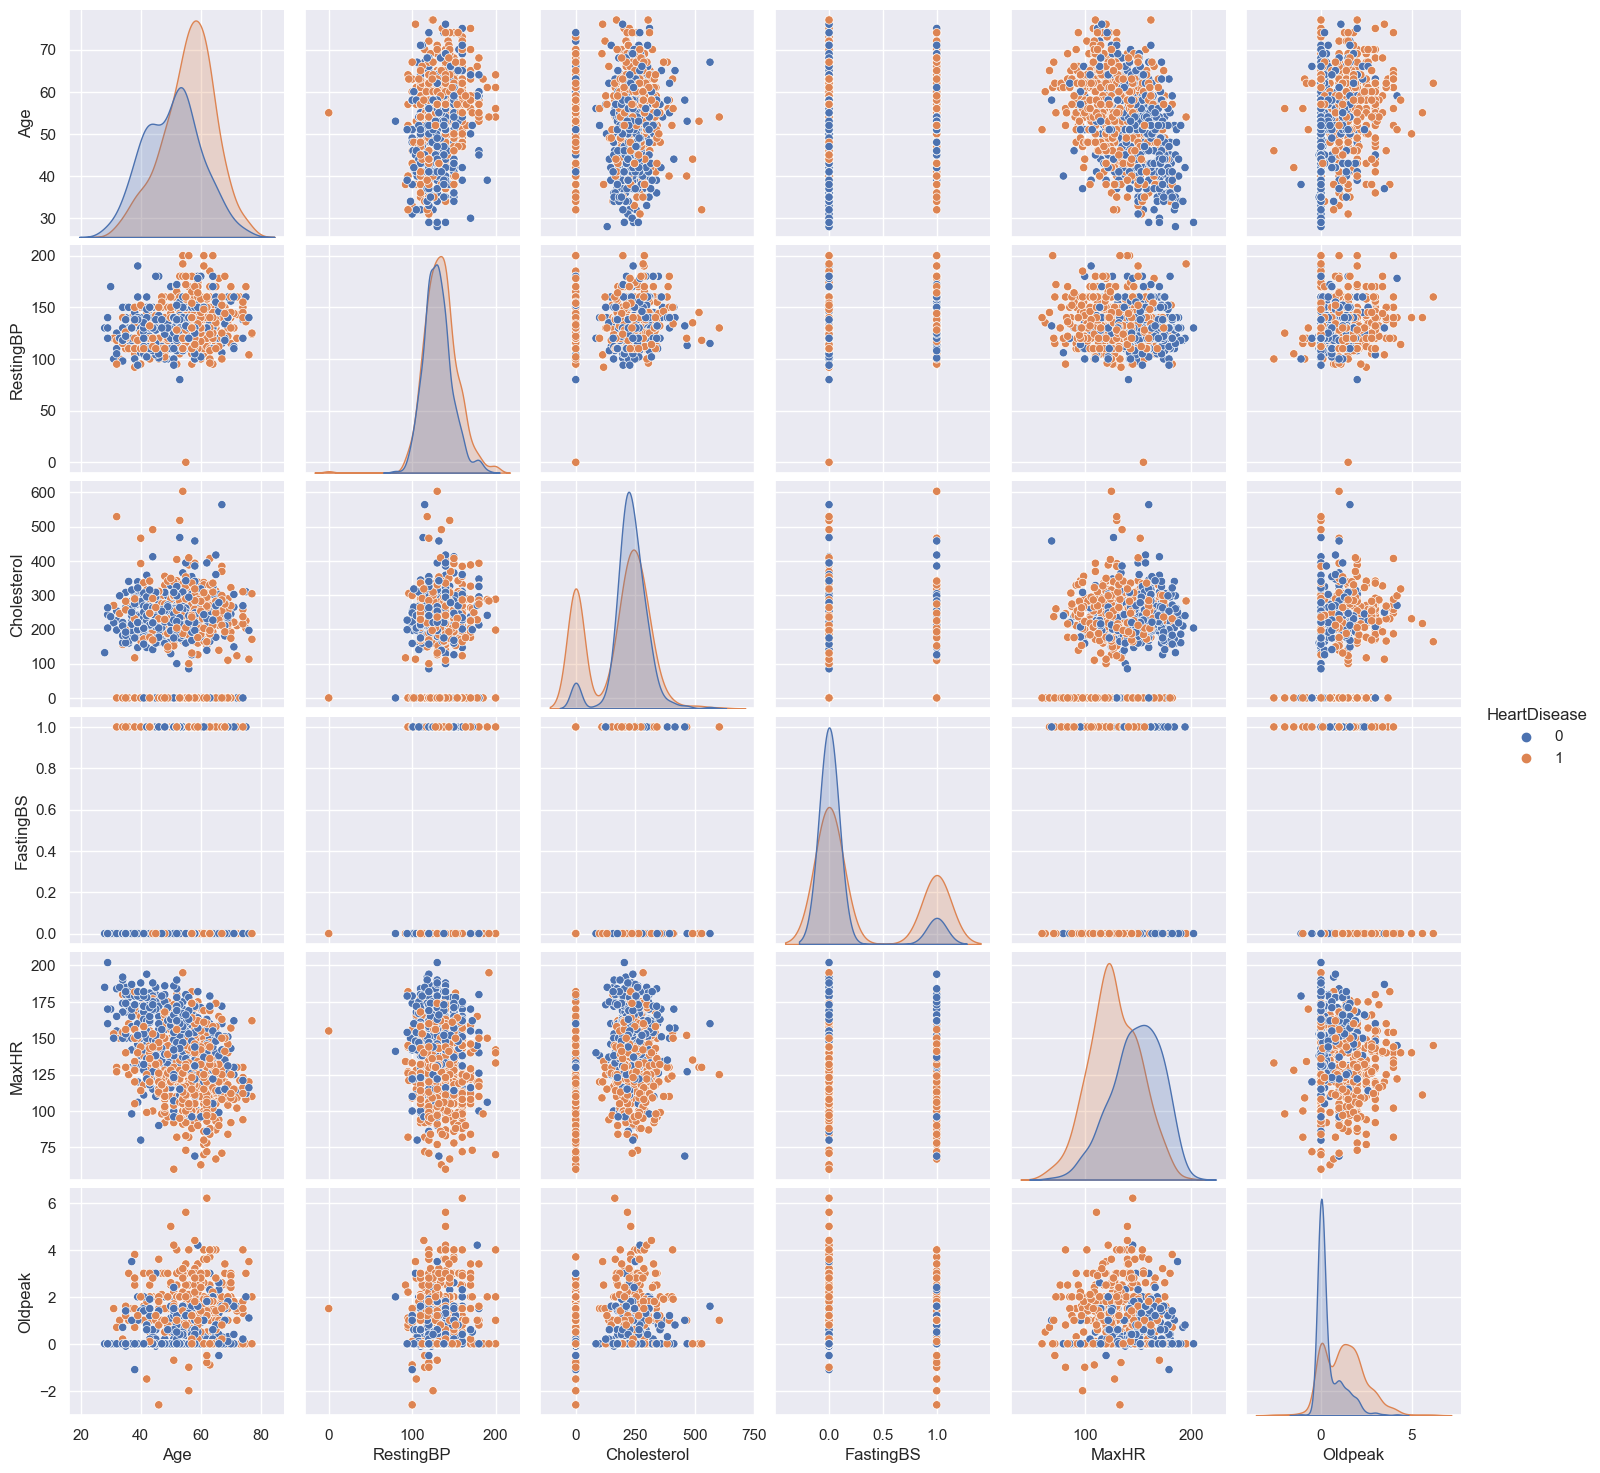

In [49]:
sns.set()
plt.figure(figsize = (15, 15))
sns.pairplot(df, hue = 'HeartDisease')
plt.show()

## convert catagorical values into numerical values.

In [101]:
dummy1 = pd.get_dummies(df['Sex'])
dummy2 = pd.get_dummies(df['ChestPainType'])
dummy3 = pd.get_dummies(df['RestingECG'])
dummy4 = pd.get_dummies(df['ExerciseAngina'])
dummy5 = pd.get_dummies(df['ST_Slope'])

In [102]:
df = pd.concat([df, dummy1, dummy2, dummy3, dummy4, dummy5], axis = 1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1


In [103]:
df.drop(columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis = 1, inplace = True)
df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [104]:
#split dataset into x and y.
x = df.drop(columns = 'HeartDisease', axis = 1)
y = df['HeartDisease']

In [107]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [108]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [109]:
#standardize data
sc = StandardScaler()
x = sc.fit_transform(x)

In [111]:
x = pd.DataFrame(x, columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'F', 'M', 'ASY', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'ST', 'N', 'Y', 'Down', 'Flat', 'Up'])  
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674


In [112]:
x.std()

Age            1.000545
RestingBP      1.000545
Cholesterol    1.000545
FastingBS      1.000545
MaxHR          1.000545
Oldpeak        1.000545
F              1.000545
M              1.000545
ASY            1.000545
ATA            1.000545
NAP            1.000545
TA             1.000545
LVH            1.000545
Normal         1.000545
ST             1.000545
N              1.000545
Y              1.000545
Down           1.000545
Flat           1.000545
Up             1.000545
dtype: float64